2.1

In [16]:
from mxnet import np,npx
npx.set_np()

In [3]:
x=np.arange(12)

In [5]:
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [4]:
x=x.reshape(3,4)

In [6]:
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [9]:
x=np.arange(12).reshape(3,4)
y=np.array([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
np.concatenate([x,y],axis=0),np.concatenate([x,y],axis=1)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [14]:
x==y

array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [11]:
x<y

array([[ True, False,  True, False],
       [False, False, False, False],
       [False, False, False, False]])

In [15]:
x>y

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [19]:
x=np.arange(12).reshape(2,3,2)
x

array([[[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.]],

       [[ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]]])

In [23]:
y=np.random.normal(0,1,size=(2,3,2))
y

array([[[-2.3556297 , -0.45138445],
        [ 0.5414402 ,  0.57938355],
        [ 2.6785066 , -1.856082  ]],

       [[ 1.2546344 , -1.9768796 ],
        [-0.54877394, -0.20801921],
        [-0.68106437,  0.2444218 ]]])

In [24]:
x==y

array([[[False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False]]])

2.5 auto diff

In [644]:
from torch.autograd import Variable

In [645]:
# y=2X.T(X)
x = Variable(torch.arange(4, dtype=torch.float32).reshape((4, 1)), requires_grad=True)
#requires_Grad=True, to tell a tensor to store the gradient
print(x)  

tensor([[0.],
        [1.],
        [2.],
        [3.]], requires_grad=True)


In [648]:
y=x*torch.mm(x.t(),x)
print(y)

tensor([[ 0.],
        [14.],
        [28.],
        [42.]], grad_fn=<MulBackward0>)


In [649]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [651]:
print("x.grad:", x.grad)
print("y.grad_fn:", y.grad_fn)

x.grad: None
y.grad_fn: <MulBackward0 object at 0x14d102910>


In [652]:
#to train model from running mode to eval/ train mode:
# model.eval() or model.train()

In [653]:
def f(a):
    b = a * 2
    while b.norm().item() < 1000:
        b = b * 2
    if b.sum().item() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [655]:
#with auto diff, even if func contains conditionals or loops, we 
# can still find the gradient of a variable

a = torch.randn(size=(1,))
a.requires_grad=True
d = f(a)
d.backward()
print(a.grad==(d/a)) 

tensor([True])


In [656]:
#head grad and chain rule
#when we call backward method, e.g y.backward(), y a func of x
# we are only int in diff of y w.r.t x, but sometimes, we may be int in
# the diff of z w.r.t x, where z a func of y, y a func of x (chain rule)

#when y part of a larger func z and we want x.grad to store dz/dx,
# we pass in the head gradient dz/dy as an input to backward()

x = Variable(torch.tensor([[0.],[1.],[2.],[3.]]), requires_grad=True)
y=x*2
z=y*x

head_grad=torch.tensor([[10],[1.],[.1],[.01]])

z.backward(head_grad)

x.grad




tensor([[0.0000],
        [4.0000],
        [0.8000],
        [0.1200]])

In [1]:
import os

In [2]:
def mkdir_if_not_exist(path):
    if not isinstance(path,str):
        path=os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

In [3]:
data_file='../data/house_tiny.csv'
mkdir_if_not_exist('../data')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n') #col names
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [4]:
import pandas as pd

In [124]:
data=pd.read_csv(data_file)

In [125]:
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [35]:
#imputation, replacing missing values with substituted ones
inputs,outputs=data.iloc[:,0:2], data.iloc[:,2]
inputs=inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [36]:
inputs=pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [37]:
x,y= np.array(inputs.values), np.array(outputs.values)
x,y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

In [126]:
#deleting column with most missing values
data.loc[4]=[3.,'Pave',127500]
data.loc[5]=[None,None,1529343]
data.loc[6]=[None,'Pave',None]
data.loc[7]=[5.,'Pave',106000]

In [127]:
data

,NumRooms,Alley,Price
0,NaN,Pave,127500.0
1,2.0,NaN,106000.0
2,4.0,NaN,178100.0
3,NaN,NaN,140000.0
4,3.0,Pave,127500.0
5,NaN,NaN,1529343.0
6,NaN,Pave,NaN
7,5.0,Pave,106000.0


In [128]:
remove=0
col=0
for i in range(3):
    if data.isna().sum()[i]>remove:
        remove=data.isna().sum()[i]    
        col=i

In [129]:
data


,NumRooms,Alley,Price
0,NaN,Pave,127500.0
1,2.0,NaN,106000.0
2,4.0,NaN,178100.0
3,NaN,NaN,140000.0
4,3.0,Pave,127500.0
5,NaN,NaN,1529343.0
6,NaN,Pave,NaN
7,5.0,Pave,106000.0


In [130]:
col

0

In [131]:
data=data.drop(['NumRooms'],axis=1)

In [132]:
data

,Alley,Price
0,Pave,127500.0
1,NaN,106000.0
2,NaN,178100.0
3,NaN,140000.0
4,Pave,127500.0
5,NaN,1529343.0
6,Pave,NaN
7,Pave,106000.0


In [135]:
data=data.fillna(data.mean())

In [136]:
data

,Alley,Price
0,Pave,1.275000e+05
1,NaN,1.060000e+05
2,NaN,1.781000e+05
3,NaN,1.400000e+05
4,Pave,1.275000e+05
5,NaN,1.529343e+06
6,Pave,3.306347e+05
7,Pave,1.060000e+05


In [138]:
data=pd.get_dummies(data,dummy_na=True)
data

,Price,Alley_Pave,Alley_nan
0,1.275000e+05,1,0
1,1.060000e+05,0,1
2,1.781000e+05,0,1
3,1.400000e+05,0,1
4,1.275000e+05,1,0
5,1.529343e+06,0,1
6,3.306347e+05,1,0
7,1.060000e+05,1,0


In [139]:
x,y=np.array(data.iloc[:,1:].values),np.array(data.iloc[:,0].values)
x,y

(array([[1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0]], dtype=uint8),
 array([ 127500.        ,  106000.        ,  178100.        ,
         140000.        ,  127500.        , 1529343.        ,
         330634.71428571,  106000.        ], dtype=float64))

In [150]:
A=np.arange(20).reshape(5,4)
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

2.7

In [166]:
from mxnet import np
print(dir(np.random))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mx_nd_np', 'absolute_import', 'choice', 'multinomial', 'normal', 'rand', 'randint', 'shuffle', 'uniform']


# Pytorch: Implementation of Linear Regression

In [5]:
import torch
import numpy as np


In [187]:
# generating dataset
def synthetic_data(w,b,num_examples):
    x=np.random.normal(0,1,(num_examples,len(w)))
    y=np.dot(x,w)+b #get target from data
    y+=np.random.normal(0,0.01,y.shape) #adding gaussian noise
    x=torch.from_numpy(x).float()
    y=torch.from_numpy(y).float().reshape(-1,1)
    return x,y
true_w=torch.Tensor([2,-3.4])
true_b=4.2
features,labels= synthetic_data(true_w,true_b,1000)

In [188]:
from torch.utils.data import TensorDataset,DataLoader
def load_array(data_arrays, batch_size, is_train=True):
    dataset=TensorDataset(*(features,labels))
    dataloader = DataLoader(dataset=dataset,batch_size=batch_size,shuffle=True)
    return dataloader
data_iter = load_array((features, labels), 10)

In [218]:
for x,y in data_iter:
    print(x)
    print(y)   #first batch
    break

tensor([[-0.7102, -0.7287],
        [-0.4365,  0.1715],
        [-0.0275,  2.1743],
        [ 0.3884, -0.0049],
        [-1.0057,  1.2499],
        [-1.0344, -0.3033],
        [-0.4459, -2.0767],
        [-0.4616,  1.2338],
        [-0.4810, -1.4311],
        [-0.2654, -1.7044]])
tensor([[ 5.2388],
        [ 2.7511],
        [-3.2618],
        [ 5.0141],
        [-2.0654],
        [ 3.1771],
        [10.3581],
        [-0.9193],
        [ 8.0947],
        [ 9.4568]])


In [224]:
#defining our model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.layer1= torch.nn.Linear(2,1,bias=True) #takes in 2 input and output 1 value
        
    def forward(self,x):
        y_pred=self.layer1(x)
        return y_pred
net=LinearRegressionModel()

In [225]:
#initialising our parameters
net.layer1.weight.data=torch.Tensor(np.random.normal(size=(1,2),scale=0.01,loc=0))#mean=0,std=0.01
net.layer1.bias.data=torch.Tensor([0])

#defining our loss function
loss=torch.nn.MSELoss(reduction="sum") #sum up loss of all datapoint, reduction can also be "mean"

#optimisation algo
optim_=torch.optim.SGD(net.parameters(),lr=0.03) #stochastic gd with learning_rate=0.03



In [229]:
#training our model
epoch=3
for i in range(epoch):
    for x,y in data_iter: #each batch
        l=loss(net(x),y) #loss between actual and pred
        optim_.zero_grad() #set grad to zero so previous calc wont affect current calc
        l.backward() #backward propagation to calc gradient
        optim_.step() #train model with grad of loss
    loss_epoch=loss(net(features),labels) #total loss 
    print('epoch {},loss {}'.format(i+1,loss_epoch))
        

epoch 1,loss 0.10916633158922195
epoch 2,loss 0.12032543122768402
epoch 3,loss 0.11862572282552719


In [231]:
w=list(net.parameters())[0][0]
b=list(net.parameters())[1][0]
print(w)
print(true_w)
print(b)
print(true_b)


tensor([ 1.9977, -3.3973], grad_fn=<SelectBackward>)
tensor([ 2.0000, -3.4000])
tensor(4.1988, grad_fn=<SelectBackward>)
4.2


In [237]:
loss2= torch.nn.SmoothL1Loss()

epoch=3
for i in range(epoch):
    for x,y in data_iter: #each batch
        l=loss2(net(x),y) #loss between actual and pred
        optim_.zero_grad() #set grad to zero so previous calc wont affect current calc
        l.backward() #backward propagation to calc gradient
        optim_.step() #train model with grad of loss
    loss_epoch=loss2(net(features),labels) #total loss 
    print('epoch {},loss {}'.format(i+1,loss_epoch))

epoch 1,loss 4.967113636666909e-05
epoch 2,loss 4.9558948376215994e-05
epoch 3,loss 4.950709262629971e-05


In [246]:
w_huber=list(net.parameters())[0][0]
b_huber=list(net.parameters())[1][0]

error_w_huber= w_huber-true_w
error_w=w-true_w
error_b_huber= b_huber-true_b
error_b= b-true_b

print('huber weights error: [{:10f},{:10f}]'.format(error_w_huber[0],error_w_huber[1]))
print('weights error: [{:10f},{:10f}]'.format(error_w[0],error_w[1]))
print('huber bias error: {:10f}'.format(error_b_huber))
print('bias error: {:10f}'.format(error_b))

huber weights error: [  0.000238, -0.000256]
weights error: [  0.000238, -0.000256]
huber bias error:   0.000257
bias error:   0.000257


******If we replace l = loss(output, y) with l = loss(output, y).mean(), we need to change trainer. step(batch_size) to trainer.step(1) accordingly. Why?


Review the pytorch documentation to see what loss functions and initialization methods are provided in the modules nn.loss and init. Replace the loss by Huber’s loss.


How do you access the gradient of Linear.weight?
net.layer1.weight.grad

In [16]:
# Pytorch: Implementation of Linear Regression from Scratch

In [18]:
conda install Ipython

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [19]:
#from Ipython import display
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [23]:
#Generating Data Sets
num_inputs=2
num_examples=1000
true_w=torch.tensor([2,-3.4])
true_b=4.2
features=torch.zeros(size=(num_examples,num_inputs)).normal_()
labels=torch.matmul(features,true_w)+true_b
labels+=torch.zeros(size=labels.shape).normal_(std=0.01) #add noise

In [46]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[j],labels[j] # return features and labels for batch j
        

In [50]:
w = torch.zeros(size=(num_inputs, 1)).normal_(std=0.01)
b = torch.zeros(size=(1,))

In [51]:
w.requires_grad_(True) #so that it will store a gradient for our parameters
b.requires_grad_(True)

tensor([0.], requires_grad=True)

In [52]:
#defining our model
def linreg(x,w,b):
    return torch.matmul(x,w)+b
#defining our loss function
def squared_loss(y_hat,y):
    return ((y_hat-y.reshape(y_hat.shape))**2)/2
#defining optimization algo
def sgd(params,lr,batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size) #gradient_descent
        param.grad.data.zero_() #reset gradients to zero
        

*** l.mean().backward() how does it know w.r.t what variables?

In [53]:
#training our model
learning_rate=0.03
epochs=3
net=linreg
loss=squared_loss
batch_size=31

for epoch in range(epochs):
    for x,y in data_iter(batch_size,features,labels):
        l=loss(net(x,w,b),y) #loss between actual and prediction
        l.mean().backward() #backpropagation, compute gradient on l w.r.t [w,b]
        sgd([w,b],learning_rate,batch_size)
    with torch.no_grad():
        train_loss=loss(net(features,w,b),labels)
        print('epoch %d,loss %f' % (epoch+1, train_loss.mean().numpy()))


epoch 1,loss 14.979836
epoch 2,loss 14.079806
epoch 3,loss 13.243937


# Implementation of Softmax Regression
## Image Classification from scratch

In [675]:
import sys
sys.path.insert(0,'..')
import torch.nn as nn

In [676]:
import d2l

In [260]:
pip install git+https://github.com/d2l-ai/d2l-en

  Cloning https://github.com/d2l-ai/d2l-en to /private/var/folders/zc/yh01ktsn5t3g1x46925gs2sm0000gn/T/pip-req-build-tbutobds
  Running command git clone -q https://github.com/d2l-ai/d2l-en /private/var/folders/zc/yh01ktsn5t3g1x46925gs2sm0000gn/T/pip-req-build-tbutobds


  Created wheel for d2l: filename=d2l-0.11.4-cp37-none-any.whl size=32667 sha256=3cdfb07cca8df27b61f9c2871a5dda4b71065fa64f8edfffd0dcc9087122137a
  Stored in directory: /private/var/folders/zc/yh01ktsn5t3g1x46925gs2sm0000gn/T/pip-ephem-wheel-cache-uy5umits/wheels/82/6f/b8/8422c7ed664272685e3d139b127f89df39d934704a14b2156c
Successfully built d2l
Note: you may need to restart the kernel to use updated packages.


In [677]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
trans=transforms.ToTensor()

In [678]:
# By default pytorch torchvision datasets are of type PIL.
# Define a transform "trans" to change the PIL to Tensor format.
mnist_train= torchvision.datasets.FashionMNIST(root="./",train=True,transform=trans,target_transform=None,download=True)
mnist_test= torchvision.datasets.FashionMNIST(root="./",train=False,transform=trans,target_transform=None,download=True)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


/Users/distiller/project/conda/conda-bld/pytorch_1587428061935/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [679]:
len(mnist_train),len(mnist_test)


(60000, 10000)

In [680]:
feature,label=mnist_train[0] #first example
feature.shape,feature.dtype
#our image is 28x28 pixels, pytorch wil automatically scales it into a tensor with each pixel value between 0 and 1.
#grayscale image

(torch.Size([1, 28, 28]), torch.float32)

In [682]:
label,type(label)

(9, int)

In [684]:
def get_fashion_mnist_labels(labels):
    text_labels= ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [textlabels[int(i)] for i in labels]
#converts a numeric label into a corresponding text label                           
                        

In [685]:
def show_fashion_mnist(images,labels):
    d2l.use_svg_display()
    _, figs= d2l.plt.subplots(1, len(images), figsize=(12, 12)) # _ means that we ignore it
    for f,img,lbl in zip(figs,images,labels):
        f.imshow(img.reshape((28,28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

In [686]:
x=[]
y=[]
# x,y=mnist_train[0:9], but Pytorch DataLoader objects dont support regular array slicing, we can instead iterate through
for index,data in enumerate(mnist_train):
    if(index>=0 and index<10):
        x.append(data[0])
        y.append(data[1])
    if(idx>=10):
        break
show_fashion_mnist(x,get_fashion_mnist_labels(y))

NameError: name 'idx' is not defined

In [687]:
#reading in a mini-batch
batch_size=256
if sys.platform.startswith('win'):
    #windows no additional processes needed to speed up the reading of data
    num_workers=0
else:
    num_workers=4
    
train_iter=DataLoader(mnist_train,batch_size,shuffle=True,num_workers=num_workers)
test_iter=DataLoader(mnist_test,batch_size,shuffle=False,num_workers=num_workers)

In [688]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

**combining softmax and cross_entropy will help with numerical stability during backpropagation

In [689]:
#from scratch
from torch.distributions import normal
num_inputs=784 #28*28 flattened tensor
num_outputs=10

w=normal.Normal(loc=0,scale=0.01).sample((num_inputs,num_outputs))
b=torch.zeros(num_outputs)

In [690]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [691]:
#torch.sum review
x=torch.tensor([[1,2,3],[4,5,6]])
torch.sum(x,dim=0,keepdim=True), torch.sum(x,dim=1,keepdim=True)

(tensor([[5, 7, 9]]), tensor([[ 6],
         [15]]))

In [692]:
#softmax

def softmax(x):
    x_exp=torch.exp(x)
    partition=torch.sum(x_exp,dim=1,keepdim=True) #sum within each rows
    return x_exp/partition


In [693]:
#our softmax regression model
def net(x):
    return softmax(torch.matmul(x.reshape((-1,num_inputs)),w)+b)
#note that we are flattening our images x into a vector of length num_inputs

In [694]:
?torch.gather

In [695]:
#our loss function, cross entropy loss

#torch.gather selects with indicated tensor and indices and dim
y_hat=torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y=torch.tensor([0,2])
torch.gather(y_hat,dim=1,index=y.unsqueeze(dim=1)) #unsqueeze y so that shape of y and y_hat are equal
# we are using the gather function to select the appropriate terms from the matrix of softmax entries

def cross_entropy(y_hat,y):
    return -torch.gather(y_hat,1,y.unsqueeze(dim=1)).log()
#cross entropy takes the negative log likelihood of the predicted probabbility assigned to the true label -log p(y|x) 

In [697]:
def accuracy(y_hat,y):
    return (y_hat.argmax(dim=1)==y).float().mean().item()
#mean() can only calculate mean of floating types, thus .float()
#note that y_hat.argmax(dim=1)==y gives us vector of 0 and 1

In [698]:
def evaluate_accuracy(data_iter,net):
    acc_sum,n=0.0,0
    for x,y in data_iter:
        acc_sum+= (net(x).argmax(dim=1)==y).sum().item
        n+=y.size()[0] #batchsize
    return acc_sum/n

In [699]:
#training our model
epochs=5
learning_rate=0.1

def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,trainer=None):
    for epoch in range(epochs):
        train_loss_sum,train_acc_sum,n=0.0,0.0,0
        for x,y in train_iter:
            y_hat=net(x)
            l=loss(y_hat,y).sum()
            l.backward()
            if trainer is None:
                d2l.sgd(params,lr,batch_size)
            else:
                trainer.step(batch_size)
            train_loss_sum+=l.item()
            tran_acc_sum+= (y_hat.argmax(dim=1)==y).sum().item()
            n+=y.size()[0]
        test_acc=evaluate_accuracy(test_iter,net)
        print('epoch %d,loss $.4f,train acc %.3f, test acc %.3f' % (epoch+1,train_loss_sum/n,train_acc_sum/n,test_acc))

In [700]:
train_ch3(net,train_iter,test_iter,cross_entropy,epochs,batch_size,[w,b],learning_rate)

Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/Users/admin/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/Users/admin/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
  File "/Users/admin/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/Users/admin/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/Users/admin/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


RuntimeError: DataLoader worker (pid 35702) is killed by signal: Unknown signal: 0. 

In [ ]:
#prediction

for x,y in test_iter:
    break
    
true_labels=d2l.get_fashion_mnist_labels(y.numpy())
pred_labels=d2l.get_fashion_mnist_labels(net(x).argmax(dim=1).numpy())
titles=[ truelabel+ '\n'+ predlabel for truelabel,predlabel in zip(truelabels,pred_labels)]
d2l.show.fashion_mnist(x[10:20],titles[10:20])

concise implementation

In [13]:
class Reshape(torch.nn.Module):
    def forward(self,x):
        return x.view(-1,784)
net=nn.Sequential(Reshape(),
                  nn.Linear(784,10)) #takes in 784 inputs and give 10 ouputs
def init_weights(m):
    if type(m)==nn.Linear: #is a layer
        torch.nn.init.normal_(m.weight,std=0.01) #initialise weights with mean=0 and std=0/01
        
net.apply(init_weights)
    

Sequential(
  (0): Reshape()
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [14]:
loss=nn.CrossEntropyLoss()

In [15]:
epochs=10
learning_rate=0.1
d2l.train_ch3(net,train_iter,test_iter,loss,epochs,batch_size,learning_rate)

TypeError: train_ch3() takes 6 positional arguments but 7 were given

# Multilayer perceptrons

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import d2l



In [2]:
from d2l.data import load_data_fashion_mnist
from d2l.train import train_ch3


In [3]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [4]:
#our network, 2 layers therefore 2 weights and 2 bias
#28*28=784 pixels,10 classes
#MLP with one hidden layer and 256 hidden units
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.w1=nn.Parameter(torch.rand(784,256,requires_grad=True)*0.01)
        self.b1 = nn.Parameter(torch.zeros(256,requires_grad=True))
        self.w2 = nn.Parameter(torch.randn(256,10,requires_grad=True)*0.01)
        self.b2 = nn.Parameter(torch.zeros(10,requires_grad=True))
    def forward(self,x):
        x=x.reshape((-1,784)) #vector
        H= self.relu(x@self.w1 +self.b1) #@ is dot product. applying relu to input layer
        return (H@self.w2 +self.b2)
    def relu(self,s):
        a=torch.zeros_like(s)
        return torch.max(s,a) #return zero tensor of same shape or original tensor
net=Net()

In [5]:
#our loss function
criterion=nn.CrossEntropyLoss()

In [10]:
#training our model
epochs=10
learning_rate=0.5

train_ch3(net,train_iter,test_iter,criterion,epochs,batch_size,learning_rate)

epoch 1, loss 0.0065, train acc 0.329, test acc 0.365
epoch 2, loss 0.0038, train acc 0.600, test acc 0.660
epoch 3, loss 0.0028, train acc 0.730, test acc 0.784
epoch 4, loss 0.0024, train acc 0.778, test acc 0.793
epoch 5, loss 0.0022, train acc 0.799, test acc 0.747
epoch 6, loss 0.0021, train acc 0.811, test acc 0.798
epoch 7, loss 0.0020, train acc 0.818, test acc 0.805
epoch 8, loss 0.0019, train acc 0.826, test acc 0.812
epoch 9, loss 0.0019, train acc 0.829, test acc 0.793
epoch 10, loss 0.0018, train acc 0.835, test acc 0.823


In [701]:
for x,y in test_iter:
    break
    
true_labels=d2l.get_fashion_mnist_labels(y.numpy())
pred_labels=d2l.get_fashion_mnist_labels(np.argmax(net(x).data.numpy(),axis=1))

titles= [truelabel+'\n' +predlabel for truelabel,predlabel in zip(true_labels,pred_labels)]
d2l.show_fashion_mnist(x[0:9], titles[0:9])

RuntimeError: DataLoader worker (pid 35706) is killed by signal: Unknown signal: 0. 

concise implementation

In [12]:

import torch.nn.functional as F
import torch.optim as optim

In [13]:
class Net(nn.Module):
    def __init__(self, num_inputs = 784, num_outputs = 10, num_hiddens = 256, is_training = True):
        super(Net,self).__init__()
        self.num_inputs=num_inputs
        self.num_outputs=num_outputs
        self.num_hiddens=num_hiddens
        self.linear1=nn.Linear(num_inputs,num_hiddens)
        self.linear2=nn.Linear(num_hiddens,num_outputs)
        self.relu=nn.ReLU()
    def forward(self,x):
        x=x.reshape((-1,784))
        H1=self.relu(self.linear1(x))
        output=self.linear2(H1)
        return output
net=Net()


In [15]:
epochs,learning_rate,batch_size=10,0.5,256
train_iter,test_iter=load_data_fashion_mnist(batch_size)
loss_function=nn.CrossEntropyLoss()
train_ch3(net,train_iter,test_iter,loss_function,epochs,batch_size,learning_rate)

RuntimeError: DataLoader worker (pid 17950) is killed by signal: Unknown signal: 0. 

Polynomial Regression

In [16]:
import torch.nn.functional as F
import torch.utils.data as Data
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt


$$y=5+1.2x-3.4\frac{x^2}{2!}+5.6\frac{x^3}{3!}+ \epsilon \  where  \epsilon \  ~ N(0,0.1)$$

In [705]:
# generating our dataset:
max_degree=20
n_train,n_test=100,100

poly_features=torch.zeros(20,200)
true_w=torch.zeros(20)
true_w[0:4]=torch.tensor([5,1.2,-3.4,5.6])
features= torch.rand(size=(n_train+n_test,1))
x_list=torch.arange(max_degree).float()
features=features.reshape((1,-1))

for i in range(1,max_degree):
    poly_features[1]=torch.pow(features,i) #to avoid large gradients



In [709]:
dr2= torch.Tensor([[1.0000e+00],
        [2.0000e+00],
        [6.0000e+00],
        [2.4000e+01],
        [1.2000e+02],
        [7.2000e+02],
        [5.0400e+03],
        [4.0320e+04],
        [3.6288e+05],
        [3.6288e+06],
        [3.9917e+07],
        [4.7900e+08],
        [6.2270e+09],
        [8.7178e+10],
        [1.3077e+12],
        [2.0923e+13],
        [3.5569e+14],
        [6.4024e+15],
        [1.2165e+17],
        [2.4329e+18]])

In [710]:
dr2.t()

tensor([[1.0000e+00, 2.0000e+00, 6.0000e+00, 2.4000e+01, 1.2000e+02, 7.2000e+02,
         5.0400e+03, 4.0320e+04, 3.6288e+05, 3.6288e+06, 3.9917e+07, 4.7900e+08,
         6.2270e+09, 8.7178e+10, 1.3077e+12, 2.0923e+13, 3.5569e+14, 6.4024e+15,
         1.2165e+17, 2.4329e+18]])

In [711]:
dr2.T

tensor([[1.0000e+00, 2.0000e+00, 6.0000e+00, 2.4000e+01, 1.2000e+02, 7.2000e+02,
         5.0400e+03, 4.0320e+04, 3.6288e+05, 3.6288e+06, 3.9917e+07, 4.7900e+08,
         6.2270e+09, 8.7178e+10, 1.3077e+12, 2.0923e+13, 3.5569e+14, 6.4024e+15,
         1.2165e+17, 2.4329e+18]])

In [28]:
from scipy.special import factorial

ok=torch.arange(1,(max_degree)+1).reshape((1,-1))
dr=factorial(ok) #elementwise factorial
dr2=torch.from_numpy(dr) #to tensors
poly_features=poly_features.double()/dr2.t() #convert to doubles then divide bu floats

labels=torch.matmul(true_w.double(),poly_features)
poly_features=poly_features.type(torch.FloatTensor)
labels=labels.type(torch.FloatTensor)
labels+= torch.randn(200)*0.5

In [712]:
?plt.semilogy

In [29]:
#our model

#plt.semilogy makes a plot with log scaling on the y axis
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(3.5,2.5)):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals)
    if x2_vals and y2vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)
        
def fit_and_plot(train_features,train_labels,test_features,test_labels,no_inputs):
    class LinearRegressionModel(torch.nn.Module):
        def __init__(self):
            super(LinearRegressionModel,self).__init__()
            self.linear=torch.nn.Linear(no_inputs,1)
        def forward(self,x):
            y_pred=self.linear(x)
            return y_pred
    model=LinearRegressionModel()
    loss_func=torch.nn.MSELoss(reduction="sum")
    optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
    train_loss,test_loss=[],[]
    
    train_labels=train_labels.reshape(-1,1)
    train_ds=TensorDataset(train_features,train_labels)
    batch_size=10
    train_dl=DataLoader(train_ds,batch_size,shuffle=True)
    
    test_labels=test_labels.reshape(-1,1)
    
    for ep in range(100):
        for x,y in train_dl:
            pred_y=model(x)
            loss=loss_func(pred_y,y)
            
            optimizer.zero_grad()
            loss.backward() #calculate grads
            optimizer.step() #grad descent
        predy_train=model(train_features)
        train_loss.append(loss_func(predy_train,train_labels).mean())
        predy_test=model(test_features)
        test_loss.append((loss_func(predy_test,test_labels)).mean())
    print('final_epoch:train loss',train_loss[-1],'test loss',test_loss[-1])
    semilogy(range(1,ep+2),train_loss,'epoch','loss',range(1,ep+2),test_loss,['train','test'])

Weight Decay

In [3]:
n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(size=(num_inputs, 1)) * 0.01, torch.tensor(0.05)

features = torch.randn(size=(n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels.add_(torch.empty(size=labels.shape).normal_(0, std = 0.01))
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [4]:
#from scratch
def init_params():
    w=torch.randn(size=(num_inputs,1),requires_grad=True)
    b=torch.zeros((1,),requires_grad=True)
    return [w,b]
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

batch_size,epochs,learning_rate=1,100,0.003
net,loss_func=d2l.linreg,d2l.squared_loss
train_iter=torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_features,train_labels),batch_size,shuffle=True)

def fit_and_plot(lambd):
    w,b=init_params()
    train_loss,test_loss=[],[]
    for _ in range(epochs):
        for x,y in train_iter:
            with torch.enable_grad():
                y_hat=net(x,w,b)
                loss=loss_func(y_hat,y) +lambd*l2_penalty(w)
            loss.backward()
            d2l.sgd([w,b],learning_rate,batch_size)
        with torch.no_grad():
            train_loss.append(torch.mean(loss_func(net(train_features,w,b),train_labels)).item())
            test_loss.append(torch.mean(loss_func(net(test_features,w,b),test_labels)).item())
    d2l.semilogy(range(1, epochs + 1), train_loss, 'epochs', 'loss',range(1, epochs + 1), test_loss, ['train', 'test'])
    print('l2 norm of w:', torch.norm(w).item())


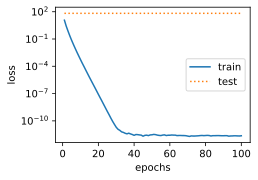

l2 norm of w: 12.999493598937988


In [5]:
fit_and_plot(0) #no regularisation

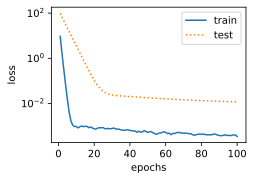

l2 norm of w: 0.03653138130903244


In [6]:
fit_and_plot(lambd=3)

In [13]:
#concise implementation

def fit_and_plot_pytorch(wd):
    net=nn.Sequential(nn.Linear(200,1))
    for param in net.parameters():
        param.data.uniform_() #random uniform initialisation of parameters
    loss_func=nn.MSELoss()
    optimizer=torch.optim.SGD([
        {"params":net[0].weight,'weight_decay':wd}, 
        {"params":net[0].bias} #weight decay for bias is 0 by default
    ],lr=learning_rate)
    train_loss,test_loss=[],[]
    for i in range(epochs):
        for x,y in train_iter:
            with torch.enable_grad():
                optimizer.zero_grad()
                loss=loss_func(net(x),y)
            loss.backward()
            optimizer.step()
        train_loss.append(torch.mean(loss_func(net(train_features),train_labels)).item())
        test_loss.append(torch.mean(loss_func(net(test_features),test_labels)).item())
    d2l.semilogy(range(1, epochs + 1), train_loss, 'epochs', 'loss',
                 range(1, epochs + 1), test_loss, ['train', 'test'])
    print('L2 norm of w:', net[0].weight.norm().item())

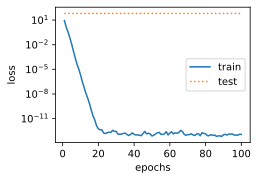

L2 norm of w: 7.928945064544678


In [14]:
fit_and_plot_pytorch(0)


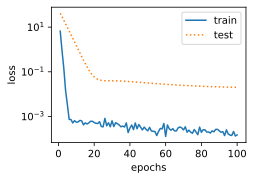

L2 norm of w: 0.04230122268199921


In [15]:
fit_and_plot_pytorch(3)

Dropout Regularisation

In [17]:
#implementation from scratch
def dropout(x,drop_prob):
    assert 0<= drop_prob <=1 #will raise error if false
    if drop_prob==1:
        return torch.zeros_like(x) #if 1 that means all dropped so all zeros
    mask=(torch.FloatTensor(x.shape).uniform_(0,1)>drop_prob).float() # a mask indicating which ones to drop

    return mask * x/(1-drop_prob) #drop out then rescale the remainder by dividing by 1.0-drop_prob
# 

In [21]:
#defining our model
drop_prob1,drop_prob2=0.2,0.5

class Net(nn.Module):
    def __init__(self,num_inputs=784,num_outputs=10,num_hiddens1=256,num_hiddens2=256,is_training=True):
        super(Net,self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_hiddens1 = num_hiddens1
        self.num_hiddens2 = num_hiddens2
        self.is_training = is_training
        
        self.linear1=nn.Linear(num_inputs,num_hiddens1)
        self.linear2=nn.Linear(num_hiddens1,num_hiddens2)
        self.linear3=nn.Linear(num_hiddens2,num_outputs)
        self.relu=nn.ReLU()
    def forward(self,x):
        x=x.reshape((-1,self.num_inputs))
        H1=self.relu(self.linear1(x))
        if self.is_training==True: #only dropout when training
            H1=dropout(H1,drop_prob1)
        H2=self.relu(self.linear2(H1))
        if self.is_training==True:
            H2=dropout(H2,drop_prob2) #only dropout when training
        output=self.linear3(H2)
        return output
net=Net()
        
        
        

In [22]:
epochs,learning_rate,batch_size=10,0.5,256
train_iter,test_iter=load_data_fashion_mnist(batch_size)
loss_func=nn.CrossEntropyLoss()
train_ch3(net,train_iter,test_iter,loss_func,epochs,batch_size,learning_rate)

epoch 1, loss 0.0034, train acc 0.670, test acc 0.748
epoch 2, loss 0.0021, train acc 0.803, test acc 0.808
epoch 3, loss 0.0018, train acc 0.831, test acc 0.803
epoch 4, loss 0.0017, train acc 0.845, test acc 0.832
epoch 5, loss 0.0016, train acc 0.853, test acc 0.804
epoch 6, loss 0.0015, train acc 0.859, test acc 0.839
epoch 7, loss 0.0014, train acc 0.865, test acc 0.836
epoch 8, loss 0.0014, train acc 0.870, test acc 0.828
epoch 9, loss 0.0014, train acc 0.873, test acc 0.845
epoch 10, loss 0.0013, train acc 0.876, test acc 0.851


#concise implementation

net=nn.Sequential(nn.Linear(784,256),
                 nn.ReLU(),
                 nn.Dropout(drop_prob1),
                 nn.Linear(256,256),
                 nn.ReLU(),
                 nn.Dropout(drop_prob2),
                 nn.Linear(256,10))
net.

In [713]:
train_ch3(net,train_iter,test_iter,loss_func,epochs,batch_size,learning_rate)

RuntimeError: DataLoader worker (pid 35733) is killed by signal: Unknown signal: 0. 

Numerical Stability and Initialisation

In [28]:
#initialising manually
conv1=torch.nn.Conv2d(2,2,1)
torch.nn.init.xavier_uniform_(conv1.weight)

def init_weights(m):
    if type(m)==nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
net=nn.Sequential(nn.Linear(2,2),
                 nn.Linear(2,2))
net.apply(init_weights)
        

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

Predicting House Prices

In [31]:
from IPython.display import Image

In [34]:
import pandas as pd

In [36]:
pwd

'/Users/admin/Documents/Abeja/d2l'

In [37]:
train_data=pd.read_csv('/Users/admin/Documents/Abeja/d2l/data/kaggle_house_pred_train.csv')
test_data = pd.read_csv('/Users/admin/Documents/Abeja/d2l/data/kaggle_house_pred_test.csv')

In [39]:
train_data.shape,test_data.shape

((1460, 81), (1459, 80))

In [41]:
train_data.iloc[0:4,[0,1,2,3,-3,-2,-1]]
# first 4 rows, first 4 colummns and last 3 columns

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [48]:
all_features=pd.concat((train_data.iloc[:,1:-1],test_data.iloc[:,1:]))
#combine train_data and test_data. all rows. for train: 1st to 2nd last column. for test: 1 to last column
#last col is label

In [50]:
#Data Preprocessing
#numeric values
# 1) replace missing values with mean
# 2) adjust them to a common scale, zero mean and unit variance, 
# minus mean, divide by std

numeric_features=all_features.dtypes[all_features.dtypes!='object'].index
all_features[numeric_features]=all_features[numeric_features].apply(lambda x: (x-x.mean())/x.std())
#after standardizing, all means vanish therefore we can set missing values to 0
all_features[numeric_features]=all_features[numeric_features].fillna(0)

#discrete values
#replace them by one-hot-encoding #1 and 0s
all_features=pd.get_dummies(all_features,dummy_na=True)
all_features.shape


(2919, 331)

In [52]:
#extract to np then convert to tensor
n_train=train_data.shape[0]
train_features=torch.tensor(all_features[:n_train].values.astype(np.float32))
test_features=torch.tensor(all_features[n_train:].values.astype(np.float32))

train_labels=torch.tensor(train_data.SalePrice.values.astype(np.float32)).reshape((-1,1))


In [63]:
loss_func=nn.MSELoss()
def get_net():
    net=nn.Sequential(nn.Linear(train_features.shape[1],1))
    return net
#note that with house prices we care more about relative quantities than absolute quantities
#therefore, care more about relative error than absolute error

#one way to address this problem is to measure discrepancy in the logarithm of price estimate


$$L = \sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}$$


In [714]:
?torch.clamp

In [64]:
def log_rmse(net,features,labels): #log relative mse
    #clamp ensures all elements are within the min and max
    clipped_preds=torch.clamp(net(features),1,float('inf'))
    #stabilises the value when log is taken by setting values <1 as 1
    rmse=torch.sqrt(torch.mean(loss_func(torch.log(clipped_preds),torch.log(labels))))
    return rmse.item()

In [86]:
# adam vs vanilla SGD:
# Adam despite doing no better or sometimes worse given unlimited resources for
#hyperparameter optimisation, it is significantly less sensitive to initial learning rate

def train(net,train_features,train_labels,test_features,test_labels,num_epochs,learning_rate,weight_decay,batch_size):
    train_loss,test_loss=[],[]
    train_iter=torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_features,train_labels),batch_size,shuffle=True)
    optimizer=torch.optim.Adam(net.parameters(),lr=learning_rate,weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for x,y in train_iter:
            optimizer.zero_grad()
            outputs=net(x)
            loss=loss_func(outputs,y)
            loss.backward()
            optimizer.step()
        train_loss.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_loss.append(log_rmse(net,test_features,test_labels))
    return train_loss,test_loss

In [87]:
#k-fold cross validation
def get_k_fold_data(k,i,x,y): # i is the fold for cross validation
    assert k>1
    fold_size=x.shape[0]//k #number of data points in each fold
    x_train,y_train=None,None
    for j in range(k):
        idx=slice(j*fold_size,(j+1)*fold_size)
        x_part,y_part=x[idx,:],y[idx]  #idx tells us from which row to which row
        if j==i:
            x_valid,y_valid=x_part,y_part
        elif x_train is None:
            x_train,y_train=x_part,y_part
        else:
            x_train=torch.cat((x_train,x_part),dim=0)
            y_train=torch.cat((y_train,y_part),dim=0)
    return x_train,y_train,x_valid,y_valid

def k_fold(k,x_train,y_train,num_epochs,learning_rate,weight_decay,batch_size):
    train_loss_sum,valid_loss_sum=0,0
    for i in range(k):
        data=get_k_fold_data(k,i,x_train,y_train)
        net=get_net()
        train_loss,valid_loss=train(net,*data,num_epochs,learning_rate,weight_decay,batch_size)
        train_loss_sum+=train_loss[-1]
        valid_loss_sum+=valid_loss[-1]
        
        if i==0:
            d2l.semilogy(range(1,num_epochs+1),train_loss,'epochs','rmse',range(1,num_epochs+1),valid_loss,['train','valid'])
        print('fold %d, train rmse: %f, valid rmse: %f' % (i, train_loss[-1], valid_loss[-1]))
    return train_loss_sum/k,valid_loss_sum/k
    

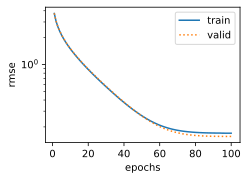

fold 0, train rmse: 0.169947, valid rmse: 0.156381
fold 1, train rmse: 0.162143, valid rmse: 0.192113
fold 2, train rmse: 0.164322, valid rmse: 0.168580
fold 3, train rmse: 0.167891, valid rmse: 0.154666
fold 4, train rmse: 0.163217, valid rmse: 0.183052
5-fold validation: avg train rmse: 0.165504, avg valid rsme 0.170959


In [88]:
#model selection
k,epochs,learning_rate,weight_decay,batch_size=5,100,5,0,64
train_loss,valid_loss=k_fold(k,train_features,train_labels,epochs,learning_rate,weight_decay,batch_size)
print('%d-fold validation: avg train rmse: %f, avg valid rsme %f' %(k,train_loss,valid_loss))

In [93]:
def train_and_pred(train_features,test_features,train_labels,test_data,num_epochs,learning_rate,weight_decay,batch_size):
    net=get_net()
    train_loss,_=train(net,train_features,train_labels,None,None,num_epochs,learning_rate,weight_decay,batch_size)
    d2l.semilogy(range(1,num_epochs+1),train_loss,'epoch','rmse')
    print('train_rsme %f' %train_loss[-1])
    
    preds=net(test_features).detach().numpy()
    #reformat it for export to kaggle
    test_data['SalePrice']=pd.Series(preds.reshape(1,-1)[0])
    submission=pd.concat([test_data['Id'],test_data['SalePrice']],axis=1)
    submission.to_csv('houseprice_regression.csv',index=False)

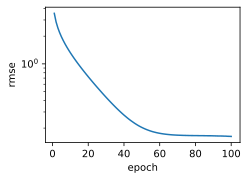

train_rsme 0.162491


In [94]:
train_and_pred(train_features, test_features, train_labels, test_data,
               epochs, learning_rate, weight_decay, batch_size)

# Deep Learning Computations

In [715]:
#custom block
#*args allow us to pass in argument of variable length/number(non keyworded) e.g 1,2,3,...
#*kwargs allows us to pass in argument that are keyworded(e.g {'arg1':1,'arg2':2.....}) key and values

class MLP(nn.Module):
    def __init__(self, **kwargs):
        super(MLP,self).__init__()
        self.hidden=nn.Sequential(nn.Linear(20,256),nn.ReLu())
        self.output=nn.Linear(256,10)
    def forward(self,x):
        return self.output(self.hidden(x))

In [716]:
class MySequential(nn.Sequential):
    def __init__(self,**kwargs):
        super(MySequential,self).__init__(**kwargs)
    def add_module(self,block):
        #note : here, block is an instance of a Block subclass. we save it in 
        # the member variable )children of the Block Class and with type OrderedDict.
        # when MySequential instance calls the the initialisation function, the system automatically
        # initializes all members of _children
        self._modules[block]=block
    def forward(self,x):
        #OrderedDict guarantees that members will be traversed in the order they were added
        for block in self._modules.values():
            x=block(x)
        return x
    
        

In [717]:
#how it works.
net=MySequential()
net.add_module(nn.Linear(20,256))
net.add_module(nn.ReLU())
net.add_module(nn.Linear(256,10))

# the sequential class makes model construction easier, and we do not need to
#define the forward method, directly inheriting the Block class which greatly expand the flexibility of model construction.


In [721]:
net._modules

OrderedDict([(Linear(in_features=20, out_features=256, bias=True),
              Linear(in_features=20, out_features=256, bias=True)),
             (ReLU(), ReLU()),
             (Linear(in_features=256, out_features=10, bias=True),
              Linear(in_features=256, out_features=10, bias=True))])

In [722]:
class FancyMLP(nn.Sequential):
    def __init__(self,**kwargs):
        super(FancyMLP,self).__init__(**kwargs)
        
        self.dense1=nn.Sequential(nn.Linear(20,20),nn.ReLU())
        self.rand_weight=nn.Parameter(torch.empty(20,20).uniform_(0,1))
        #used constant weight Rand_weight, which is not a parameter!
        
        self.dense=nn.Sequential(nn.Linear(20,256),nn.ReLU())
        self.register_buffer('random_weights',self.rand_weight)
        
    def forward(self,x):
        x=self.dense1(x)
        print(x.shape)
        #torch.mm is matrix multiplication
        x=F.relu(torch.mm(x,Variable(self.random_weights).data)+1)
        x=self.dense(x)
        while x.norm().item()>1:
            x/=2
        if x.norm().item()<0.5:
            x*=10
        return x.sum()

In [723]:
class NestMLP(nn.Sequential):
    def __init__(self,**kwargs):
        super(NestMLP,self).__init__(**kwargs)
        self.net=nn.Sequential(nn.Linear(20,64),
                               nn.ReLU(),
                               nn.Linear(64,32),
                               nn.ReLU())
        self.dense=nn.Sequential(nn.Linear(32,20),
                                 nn.ReLU())
    def forward(self,x):
        return self.dense(self.net(x))


In [724]:
chimera=nn.Sequential()
chimera.add_module("Linear1",nn.Linear(20,20))
chimera.add_module("NestMlp",NestMLP())
chimera.add_module("FancyMLP",FancyMLP())

In [741]:
chimera[2].register_buffer

<bound method Module.register_buffer of FancyMLP(
  (dense1): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): ReLU()
  )
  (dense): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
  )
)>

Parameter Management

In [742]:
net=nn.Sequential()
net.add_module('Linear_1',nn.Linear(20,256,bias=False))
net.add_module('relu',nn.ReLU())
net.add_module('Linear_2',nn.Linear(256,10,bias=False))

def init_weights(m):
    if type(m)==nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)


Sequential(
  (Linear_1): Linear(in_features=20, out_features=256, bias=False)
  (relu): ReLU()
  (Linear_2): Linear(in_features=256, out_features=10, bias=False)
)

In [743]:
#accessing our parameters
# for sequential class we can access the parameters easily by calling net.parameters
print(net[0].parameters)
print(net[1].parameters)
print(net[2].parameters)

<bound method Module.parameters of Linear(in_features=20, out_features=256, bias=False)>
<bound method Module.parameters of ReLU()>
<bound method Module.parameters of Linear(in_features=256, out_features=10, bias=False)>


In [744]:
print(net[0].bias) #tells us that there is no bias

None


In [745]:
print(net.Linear_1.weight) #can also access the parameters by name
print(net[0].weight) #returns the same output as above

Parameter containing:
tensor([[ 0.0155,  0.0730,  0.0892,  ..., -0.0078, -0.0603,  0.0481],
        [-0.1056, -0.1367,  0.1298,  ..., -0.0055,  0.1243, -0.0971],
        [-0.1042,  0.0543, -0.0928,  ...,  0.0338,  0.0719,  0.0395],
        ...,
        [-0.0263,  0.0201, -0.0228,  ..., -0.0252, -0.0155, -0.1332],
        [-0.1421, -0.1406, -0.1365,  ..., -0.0760, -0.0606, -0.0964],
        [ 0.1309, -0.0491, -0.0029,  ...,  0.1092, -0.0550,  0.1046]],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0155,  0.0730,  0.0892,  ..., -0.0078, -0.0603,  0.0481],
        [-0.1056, -0.1367,  0.1298,  ..., -0.0055,  0.1243, -0.0971],
        [-0.1042,  0.0543, -0.0928,  ...,  0.0338,  0.0719,  0.0395],
        ...,
        [-0.0263,  0.0201, -0.0228,  ..., -0.0252, -0.0155, -0.1332],
        [-0.1421, -0.1406, -0.1365,  ..., -0.0760, -0.0606, -0.0964],
        [ 0.1309, -0.0491, -0.0029,  ...,  0.1092, -0.0550,  0.1046]],
       requires_grad=True)


In [746]:
print(net[0].weight.grad) #can also find out the gradient of our parameters.
#none now as we have not invoke backprop yet.

None


In [747]:
#state_dict will grab all parameters of a network in one dictionary so that we can traverse it with ease
print(net[0].state_dict) # parameters only for first layer
print(net.state_dict) # parameters for entire network

<bound method Module.state_dict of Linear(in_features=20, out_features=256, bias=False)>
<bound method Module.state_dict of Sequential(
  (Linear_1): Linear(in_features=20, out_features=256, bias=False)
  (relu): ReLU()
  (Linear_2): Linear(in_features=256, out_features=10, bias=False)
)>


In [748]:
net.state_dict()['Linear_1.weight'] #another method of getting parameters

tensor([[ 0.0155,  0.0730,  0.0892,  ..., -0.0078, -0.0603,  0.0481],
        [-0.1056, -0.1367,  0.1298,  ..., -0.0055,  0.1243, -0.0971],
        [-0.1042,  0.0543, -0.0928,  ...,  0.0338,  0.0719,  0.0395],
        ...,
        [-0.0263,  0.0201, -0.0228,  ..., -0.0252, -0.0155, -0.1332],
        [-0.1421, -0.1406, -0.1365,  ..., -0.0760, -0.0606, -0.0964],
        [ 0.1309, -0.0491, -0.0029,  ...,  0.1092, -0.0550,  0.1046]])

In [750]:
def block1():
    net = nn.Sequential(nn.Linear(16, 32),
                        nn.ReLU(),
                        nn.Linear(32, 16),
                        nn.ReLU())
    return net
def block2():
    net=nn.Sequential()
    for i in range(4):
        net.add_module('block'+str(i),block1())
    return net
#rube Goldberg
rgnet=nn.Sequential()
rgnet.add_module('model',block2())
rgnet.add_module('Last_linear_layer',nn.Linear(16,10))
rgnet.apply(init_weights)

x = torch.randn(2,16)
rgnet(x)

tensor([[-0.0285,  0.1984, -0.1853,  0.3231, -0.0393, -0.0499,  0.0117, -0.0314,
         -0.0495, -0.2153],
        [-0.0492,  0.2476, -0.1622,  0.3447, -0.0345, -0.0357, -0.0098,  0.0010,
         -0.0638, -0.1664]], grad_fn=<AddmmBackward>)

In [122]:
print(rgnet.parameters)

<bound method Module.parameters of Sequential(
  (model): Sequential(
    (block0): Sequential(
      (0): Linear(in_features=16, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
    )
    (block1): Sequential(
      (0): Linear(in_features=16, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
    )
    (block2): Sequential(
      (0): Linear(in_features=16, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
    )
    (block3): Sequential(
      (0): Linear(in_features=16, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
    )
  )
  (Last_linear_layer): Linear(in_features=16, out_features=10, bias=True)
)>


In [123]:
for param in rgnet.parameters():
    print(param.size(), param.dtype)

torch.Size([32, 16]) torch.float32
torch.Size([32]) torch.float32
torch.Size([16, 32]) torch.float32
torch.Size([16]) torch.float32
torch.Size([32, 16]) torch.float32
torch.Size([32]) torch.float32
torch.Size([16, 32]) torch.float32
torch.Size([16]) torch.float32
torch.Size([32, 16]) torch.float32
torch.Size([32]) torch.float32
torch.Size([16, 32]) torch.float32
torch.Size([16]) torch.float32
torch.Size([32, 16]) torch.float32
torch.Size([32]) torch.float32
torch.Size([16, 32]) torch.float32
torch.Size([16]) torch.float32
torch.Size([10, 16]) torch.float32
torch.Size([10]) torch.float32


In [124]:
rgnet[0][1][0].bias.data #first major block,then within it the second subblock, then within it the first layer

tensor([ 0.1240, -0.1164,  0.2323, -0.0403,  0.0711,  0.0336, -0.0426,  0.0297,
        -0.0795,  0.2264,  0.2285, -0.0425, -0.0234, -0.0156, -0.1699, -0.1603,
         0.2094, -0.1656,  0.1415,  0.0118,  0.1994,  0.0744,  0.2053, -0.0174,
         0.0741,  0.1251,  0.2019,  0.0111, -0.1186,  0.1606, -0.1275,  0.1879])

In [126]:
#parameter initialisation
linear1=nn.Linear(2,5,bias=True)
torch.nn.init.normal_(linear1.weight,mean=0,std=0.01)

#if we want to initialise all parameters to 1, we can simply change the initialiser to Constant(1)

Parameter containing:
tensor([[ 0.0092,  0.0045],
        [-0.0058, -0.0059],
        [-0.0064,  0.0079],
        [ 0.0085, -0.0087],
        [ 0.0034,  0.0018]], requires_grad=True)

In [127]:
def init_weight(m):
    if type(m)==nn.Linear:
        torch.nn.init.normal_(m.weight)
net = nn.Sequential()
net.add_module('Linear_1', nn.Linear(2, 5, bias = False))
net.add_module('Linear_2', nn.Linear(5, 5, bias = False))

net.apply(init_weight) #use apply functin to initialise

Sequential(
  (Linear_1): Linear(in_features=2, out_features=5, bias=False)
  (Linear_2): Linear(in_features=5, out_features=5, bias=False)
)

In [129]:
#built in initialisers:

def gaussian_normal(m): #initialises all parameters with gaussian rv
    if type(m)==nn.Linear:
        torch.nn.init.normal_(m.weight)
def ones(m):
    if type(m)==nn.Linear:
        torch.nn.init.constant_(m.weight,1)
# torch.nn.init.constant_(tensor,1). #to initialise all params to 1

In [131]:
#we can initialise different params to different layers using block.
block1=nn.Sequential()
block1.add_module('Linear_1',nn.Linear(2,5,bias=False))
block2=nn.Sequential()
block2.add_module('Linear_2', nn.Linear(5,5,bias=False))

model=nn.Sequential()
model.add_module('first',block1)
model.add_module('second',block2)

def xavier_normal(m):
    if type(m)==nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
def init_42(m):
    if type(m)==nn.Linear:
        torch.nn.init.constant_(m.weight,42)
        
block1.apply(xavier_normal)
block2.apply(init_42)
print(model.state_dict())

OrderedDict([('first.Linear_1.weight', tensor([[-0.2044, -0.4285],
        [-0.0128,  0.4579],
        [-0.3649, -0.1010],
        [ 0.5105, -0.4098],
        [-0.0429,  0.6737]])), ('second.Linear_2.weight', tensor([[42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42.]]))])


In [135]:
# custom initialisation for when the initialisation methods we need are not provided in the init module
def custom(m):
    torch.nn.init.uniform_(m[0].weight,-10,10) # ***why dont need type(m)==nn.Linear
    for i in range(m[0].weight.data.shape[0]): #row
        for j in range(m[0].weight.data.shape[1]): #column
            if m[0].weight.data[i][j]<=5 and m[0].weight.data[i][j]>=-5:
                m[0].weight.data[i][j]=0
                
m=nn.Sequential(nn.Linear(5,5,bias=False))
custom(m)
print(m.state_dict())
            

OrderedDict([('0.weight', tensor([[ 0.0000, -9.1897,  0.0000,  5.6623,  9.8492],
        [ 0.0000,  0.0000,  0.0000, -5.3459,  0.0000],
        [ 0.0000, -9.8780, -5.2266,  0.0000,  0.0000],
        [ 0.0000,  9.9768,  5.8080,  0.0000,  0.0000],
        [ 6.3844,  0.0000, -9.9854,  0.0000,  5.2199]]))])


In [136]:
#can also set parameters directly since .data returns a Tensor and we can access it just like any other matrix
print(m[0].weight.data)
m[0].weight.data+=1 # plus 1 to all values
print(m[0].weight.data)
m[0].weight.data[0][0] = 42 #set first element to be 42
print(m[0].weight.data)

tensor([[ 0.0000, -9.1897,  0.0000,  5.6623,  9.8492],
        [ 0.0000,  0.0000,  0.0000, -5.3459,  0.0000],
        [ 0.0000, -9.8780, -5.2266,  0.0000,  0.0000],
        [ 0.0000,  9.9768,  5.8080,  0.0000,  0.0000],
        [ 6.3844,  0.0000, -9.9854,  0.0000,  5.2199]])
tensor([[ 1.0000, -8.1897,  1.0000,  6.6623, 10.8492],
        [ 1.0000,  1.0000,  1.0000, -4.3459,  1.0000],
        [ 1.0000, -8.8780, -4.2266,  1.0000,  1.0000],
        [ 1.0000, 10.9768,  6.8080,  1.0000,  1.0000],
        [ 7.3844,  1.0000, -8.9854,  1.0000,  6.2199]])
tensor([[42.0000, -8.1897,  1.0000,  6.6623, 10.8492],
        [ 1.0000,  1.0000,  1.0000, -4.3459,  1.0000],
        [ 1.0000, -8.8780, -4.2266,  1.0000,  1.0000],
        [ 1.0000, 10.9768,  6.8080,  1.0000,  1.0000],
        [ 7.3844,  1.0000, -8.9854,  1.0000,  6.2199]])


In [137]:
#tied parameters
# when we want to share parameters across multiply layers
# example: when we want to find good word embeddings, we may decide to use the same parameters for both
# encoding and decoding of words.

shared=nn.Sequential()
shared.add_module('linear_shared',nn.Linear(8,8,bias=False))
shared.add_module('relu_shared',nn.ReLU())
net = nn.Sequential(nn.Linear(20,8,bias=False),
               nn.ReLU(),
               shared,
               shared,
               nn.Linear(8,10,bias=False))
net.apply(init_weights)

Sequential(
  (0): Linear(in_features=20, out_features=8, bias=False)
  (1): ReLU()
  (2): Sequential(
    (linear_shared): Linear(in_features=8, out_features=8, bias=False)
    (relu_shared): ReLU()
  )
  (3): Sequential(
    (linear_shared): Linear(in_features=8, out_features=8, bias=False)
    (relu_shared): ReLU()
  )
  (4): Linear(in_features=8, out_features=10, bias=False)
)

In [138]:
print(net[2][0].weight==net[3][0].weight)

tensor([[True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True]])


In [139]:
#parameters of 2nd and 3rd layer are tied. are identical rather than just being equal
# if 2nd layer changes-> 3rd layer also changes

Deferred initialisation


In [140]:
def getnet(in_features,out_features):
    net=nn.Sequential(nn.Linear(in_features,256),
                     nn.ReLU(),
                     nn.Linear(256,out_features))
    return net
net=getnet(20,10)

In [141]:
#note that in pytorch it is not possible to define a layer without mentioning the
# in_features for that layer
for name,param in net.named_parameters():
    print(name,param.shape)

0.weight torch.Size([256, 20])
0.bias torch.Size([256])
2.weight torch.Size([10, 256])
2.bias torch.Size([10])


In [142]:
#deferred initialisation in practice
def init_weights(m):
    print("Init",m)
net.apply(init_weights)

# initialiser init_weights when evoked will initialises the weight of the network.
#sets the weights of the nn to a nonzero value which helps as nn tend to get stuck
# in local minima, its a good idea to give them many different starting values
print(net[0].weight)
print(net[2].weight)

Init Linear(in_features=20, out_features=256, bias=True)
Init ReLU()
Init Linear(in_features=256, out_features=10, bias=True)
Init Sequential(
  (0): Linear(in_features=20, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)
Parameter containing:
tensor([[ 0.0077,  0.1573,  0.2030,  ...,  0.2036,  0.0712,  0.1841],
        [-0.1694, -0.1260,  0.0139,  ..., -0.1431,  0.0958, -0.0412],
        [-0.1630, -0.0613, -0.1103,  ..., -0.1111,  0.1890,  0.1624],
        ...,
        [ 0.0351,  0.0630,  0.1371,  ..., -0.0865,  0.0623, -0.0081],
        [-0.0374, -0.1579,  0.0130,  ...,  0.0054,  0.1239, -0.1550],
        [-0.1905, -0.0108,  0.0074,  ...,  0.0303, -0.1497,  0.1413]],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0343, -0.0425,  0.0288,  ..., -0.0454, -0.0474,  0.0523],
        [ 0.0455,  0.0199,  0.0618,  ...,  0.0430, -0.0047,  0.0063],
        [-0.0222, -0.0036, -0.0552,  ..., -0.0597,  0.0604, -0.0608],
        

In [ ]:
#forced initialisation
#deferred initialisation does not occur if the system knows the shape of 
#all parameters when calling the initialise function. can occur in 2 cases:
# 1) we already seen some data and we just want to reset the parameters
# 2) we specified all inputs and output dims of the network when defining it

In [148]:
net1=nn.Sequential()
net1.add_module("Linear1",nn.Linear(20,256))
net1.add_module("Linear2",nn.Linear(256,10))
print(net1)
for name,param in net1.named_parameters():
    print(name,param.shape)


Sequential(
  (Linear1): Linear(in_features=20, out_features=256, bias=True)
  (Linear2): Linear(in_features=256, out_features=10, bias=True)
)
Linear1.weight torch.Size([256, 20])
Linear1.bias torch.Size([256])
Linear2.weight torch.Size([10, 256])
Linear2.bias torch.Size([10])


In [149]:
def init_weights_forced(m):
    if type(m)==nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        

In [150]:
net1.apply(init_weights_forced)
for name,param in net1.named_parameters():
    print(name,param.shape)

Linear1.weight torch.Size([256, 20])
Linear1.bias torch.Size([256])
Linear2.weight torch.Size([10, 256])
Linear2.bias torch.Size([10])


Custom Layers

In [151]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

In [152]:
#layers w/o paramters is slightly intricate, we will start with a custom layer(module)
#that does not have any inherent parameters

In [154]:
# layers without parameters
class CenteredLayer(nn.Module):
  def __init__(self):
      super().__init__()
  def forward(self, x):
    return x - x.mean()
#constructs a layer that subtract the mean from the input

In [155]:
layer=CenteredLayer()
layer(torch.FloatTensor([1,2,3,4,5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [156]:
net=nn.Sequential(nn.Linear(8,128),
                 CenteredLayer())

In [157]:
y=net(torch.rand(4,8))
y.mean()

tensor(-1.8626e-09, grad_fn=<MeanBackward0>)

In [158]:
#layers with parameters
#these parameters can be adjusted through training
#the ParameterDict diction provide some basic housekeeping functionality
# this way we dont need to write custom serialization routines for each new custom layer
# e.g, we can use the member variable params of the ParameterDict type that comes with the Module class
#it is a dictionary that maps string type parameter names to model parameters in the parameter type
# we can create a parameter instance from parameterDict via the get function

In [159]:
params=torch.nn.ParameterDict()
params.update({"param2":nn.Parameter(Variable(torch.ones(2,3)))})
params

ParameterDict(  (param2): Parameter containing: [torch.FloatTensor of size 2x3])

In [163]:
# we can use this to implement our own version of the dense layer
# 2 parameters: bias and weight, and to make it less tandard, we will bake in the ReLU activation as default
# next we implement a fully connected layer with both weight and bias parameters

class MyDense(nn.Module):
    def __init__(self,units,in_units):
        super().__init__()
        self.weight=Variable(torch.ones(in_units,units))
        self.bias=Variable(torch.ones(units,))
    def forward(self,x):
        linear=torch.matmul(x,self.weight.data)+ self.bias.data
        return F.relu(linear)

In [164]:
dense=MyDense(units=3,in_units=5)
dense.parameters

<bound method Module.parameters of MyDense()>

In [165]:
dense(torch.rand(2,5))

tensor([[3.8404, 3.8404, 3.8404],
        [3.6412, 3.6412, 3.6412]])

In [166]:
# we can also construct models using custom layers and use it just like the built-in dense layer

net=nn.Sequential(MyDense(8,in_units=64),
                 MyDense(1,in_units=8))
net(torch.rand(2,64))

tensor([[267.0179],
        [285.8873]])

File I/O

In [167]:
# we might want to save the results for later use and distribution
# important when we have a long training process, we can save intermediate results incase training is interuptted and we lose all our progress


In [168]:
# Tensors
# we can directly use the save and load functions to store and read tensors separately

x=torch.arange(4,dtype=torch.float32)
torch.save(x,"x-file")
x2=torch.load("x-file")

In [169]:
y=torch.zeros(4)
torch.save([x,y],"x-files") #we can also store a list of tensors
x2,y2=torch.load("x-files") 

In [170]:
x2

tensor([0., 1., 2., 3.])

In [171]:
y2

tensor([0., 0., 0., 0.])

In [172]:
mydict={'x':x,'y':y}
torch.save(mydict,'mydict') #can also write and read a dictionary that maps from a string to a tensor
# this is convenient when we want to read or write all the weights in a model
mydict2=torch.load('mydict')

In [173]:
mydict2

{'x': tensor([0., 1., 2., 3.]), 'y': tensor([0., 0., 0., 0.])}

In [174]:
#torch model parameters
# saving individual weight vectors(or tensors) is useful but it gets very tedious if we want to save(and later load) an entire model
# writing a script that collect all the terms and matches them to an architecture is quite troublesome
# torch has a built in functionality to load and save entire network! note: saves model parameters and not entire model.
# e.g if we have a 3 layer MLP, we need to specify the architecture separately as the models themselves can contain arbitrary code and hence cannot be serialised easily

In [175]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)
        self.relu = nn.ReLU()
    def forward(self,x):
        H1=self.relu(self.hidden(x))
        out=self.output(H1)
        return out
net=MLP()
x=torch.randn(size=(2,20))
y=net(x)

In [176]:
# we can store the parameters of the model as a file with the name mlp.params
torch.save(net.state_dict(),'mlp.params')

In [179]:
clone=MLP()
clone.load_state_dict(torch.load("mlp.params"))
clone

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
)

# Convolutional Neural Network

convolution for images

In [181]:
#cross-correlation operator

In [206]:
def corr2d(x,k):
    h, w=k.shape #k is our kernel
    Y=torch.zeros((x.shape[0]-h+1,x.shape[1]-w+1))
    
    for i in range(Y.shape[0]): #all rows
        for j in range(Y.shape[1]): #all columns
            Y[i,j]=(x[i:i+h,j:j+w]*k).sum() 
            #only values from row i to i+h and cols j to j+w
            #then multiply with kernel then take sum
    return Y
        
    

In [195]:
#2-d convolutional layer
class Conv2D(nn.Module):
    def __init__(self,kernel_size,**kwargs):
        super(Conv2D,self).__init__(**kwargs)
        self.weight=torch.rnd(kernel_size,dtype=torch.float32,requires_grad=True)
        self.bias=torch.zeros((1,),dtype=torch.float32,requires_grad=True)
    def forward(self,x):
        return corr2d(x,self.weight) +self.bias #crosscorrelation operator between x and kernel + bias
    

In [214]:
#object edge detection in images
x=torch.ones((6,8))
x[:,2:6]=0 #middle 4 column black(0), the rest white(1)

k=torch.Tensor([[1,-1]]) #our kernel of heigh 1 and width 2
# when we perform cross-correlation with input, 
#if horizontally adjacent input the same: output=0
#otherwise output is non zero

In [215]:
y=corr2d(x,k)
y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [210]:
corr2d(x.t(), k) #transpose become horizontal edge, not detected

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [216]:
#learning a kernel

conv2d=nn.Conv2d(1,1,kernel_size=(1,2),bias=False)

#2d conv layer uses 4 dimensional input and output in the format of:
# (example channel,height,width), where the batchsize and num of channels are both 1

x=x.reshape((1,1,6,8))
y=y.reshape((1,1,6,7))

for i in range(10):
    y_hat=conv2d(x)
    loss=(y_hat-y)**2
    
    conv2d.zero_grad()
    loss.sum().backward()
    conv2d.weight.data[:] -= 3e-2 *conv2d.weight.grad
    if (i+1)%2==0:
        print('batch %d,loss %.3f' %(i+1,loss.sum()))




batch 2,loss 7.823
batch 4,loss 1.498
batch 6,loss 0.327
batch 8,loss 0.086
batch 10,loss 0.027


In [218]:
conv2d.weight.data.reshape((1, 2))
#our learned kernel k is close to the kernel array k we defined earlier

tensor([[ 1.0014, -0.9710]])

padding and stride

In [220]:
# padding and stride
def comp_conv2d(conv2d,x):
    #(1,1) indicates that batch size and number of channels are both 1
    x=x.reshape((1,1)+x.shape)
    y=conv2d(x)
    return y.reshape(y.shape[2:]) #exclude the first 2 dims batch and channel

conv2d=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,padding=1)
x=torch.rand(size=(8,8))
comp_conv2d(conv2d,x).shape


torch.Size([8, 8])

In [222]:
(1,1)+x.shape

(1, 1, 8, 8)

In [225]:
# can use different h and w for kernel and padding too.
conv2d = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, x).shape
# height= 8-5+2+1=6
#width=8 -3 +1+1=7

torch.Size([8, 8])

In [226]:
#stride
conv2d=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,padding=1,stride=2)
comp_conv2d(conv2d,x).shape
#height= (8-3+1+2)/2 =4

torch.Size([4, 4])

In [228]:
conv2d = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, x).shape
#height =(8-3+3)/3=2
#width =(8-5+1+4)/4= 2

torch.Size([2, 2])

Multiple input and output channels

In [229]:
#multiple input channels 
# we are only doing one cross-correlation operation per channel then adding the results up
def corr2d_multi_in(x,k):
    #first traverse along 0th dim, channel dim of x and k
    #then sum them up using sum() which takes in a list as args
    return sum([d2l.corr2d(x,k) for x,k in zip(x,k)])

In [751]:
X = torch.tensor([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
                  [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
K = torch.tensor([[[0, 1], [2, 3]],
                  [[1, 2], [3, 4]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [752]:
K.shape

torch.Size([2, 2, 2])

In [753]:
#multiple output channels
def corr2d_multi_in_out(x,k):
    #traverse along 0th dim of k and each time perform cross-correlation
    # with x. then merge all the results using stack function
    return torch.stack([corr2d_multi_in(x,k) for k in K],dim=0)
    #stack along the channels, dim=0 
    

In [240]:
print(K.shape)
k = torch.stack([K, K + 1, K + 2], dim=0)
test= torch.stack([K, K ,K], dim=0)
print(test.shape)
k.shape

torch.Size([2, 2, 2])
torch.Size([3, 2, 2, 2])


torch.Size([3, 2, 2, 2])

1x1 convolutional layer

In [754]:

#1x1 typicaaly used to adjust num of channels between network layer
def corr2d_multi_in_out_1x1(x,k):
    c_i,h,w=x.shape #input channels based on x
    c_o=k.shape[0] #output channels is the number of channels of k
    x=x.reshape((c_i,h*w))
    k=k.reshape((c_o,c_i))
    y=torch.mm(k,x)
    return y.reshape((c_o),h,w)

In [755]:
X = torch.randn(size=(3, 3, 3)) # 3 input channels, 3x3
K = torch.randn(size=(2, 3, 1, 1)) # 2 output channels, 3 input channels, 1x1


Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K) 

(Y1 - Y2).norm().item() < 1e-6 #they are equivalent


True

In [757]:
print(Y1.shape)
print(Y2.shape)


torch.Size([2, 3, 3])
torch.Size([2, 3, 3])


Pooling

In [257]:
#pooling to gradually reduce spatial res of our hidden representations so that the higher up we go, 
# the larger the receptive field in the input

#mitigates sensitivity of conv layers to location
#spatially downsample representations

#max pool and avg pooling
def pool2d(x,pool_size,mode='max'): #max by default
    p_h,p_w=pool_size
    y=torch.zeros((x.shape[0]-p_h+1,x.shape[1]-p_w+1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]): #traversing through all elements
            if mode=='max':
                y[i,j]=x[i:i+p_h,j:j+p_w].max()
            elif mode=='avg':
                y[i, j] = x[i: i + p_h, j: j + p_w].mean()
    return y
                

In [271]:
x= torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]], dtype=torch.float32)

In [259]:
pool2d(x,(2,2)) #took the max

tensor([[4., 5.],
        [7., 8.]])

In [261]:
pool2d(X, (2, 2), 'avg') #took avg

tensor([[ 0.0521, -0.3535],
        [ 0.4442,  0.0070]])

In [277]:
#padding and stride
# to alter operation to achieve the desired output shape since pooling changes output shape
x=torch.arange(16,dtype=torch.float32).reshape((1,1,4,4))
x

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [264]:
pool2d=nn.MaxPool2d(3)
#by default, stride in MaxPool2d class has same shape as pooling window
# we used a pooling window of shape(3,3) therefore stride is (3,3)
pool2d(x)
# note: there are no parameters in the pooling layer therefore no need to 
#call the parameter initialisation function

tensor([[[[10.]]]])

In [266]:
pool2d=nn.MaxPool2d(3,padding=1,stride=2) #padding and stride can also be manually specified
pool2d(x)
# note: padding should be smaller than half of kernel size!

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [278]:
# multiple channels
x = torch.cat((x, x + 1), dim=1)
print(x)
# number of input channels = number of output channels for pooling layer!

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])


In [275]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(x) 

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

Convolutional Neural Networks (LeNet)

In [296]:
import time
import torch.optim as optim

In [280]:
class Flatten(torch.nn.Module): #need to flatten before fully connected layer!
    def forward(self,x):
        return x.view(x.shape[0],-1)
class Reshape(torch.nn.Module):
    def forward(self,x):
        return x.view(-1,1,28,28)

In [282]:
net=torch.nn.Sequential(Reshape(), #reshape into an image for conv layer
                       nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,padding=2),
                       nn.Sigmoid(),
                       nn.AvgPool2d(kernel_size=2,stride=2),
                       nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
                       nn.Sigmoid(),
                       nn.AvgPool2d(kernel_size=2,stride=2),
                       Flatten(),
                       nn.Linear(in_features=16*5*5,out_features=120),
                       nn.Sigmoid(),
                       nn.Linear(120,84),
                       nn.Sigmoid(),
                       nn.Linear(84,10))

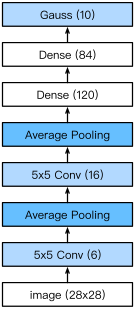

In [286]:
Image(filename="/Users/admin/Documents/Abeja/d2l/img/lenet-vert.png")

In [287]:
X = torch.randn(size=(1,1,28,28), dtype = torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Reshape output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [288]:
# Data Acquisition and Training
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size=batch_size)


In [321]:
def try_gpu():
    if torch.cuda.is_available():
        device=torch.device('cuda:0')
    else:
        device=torch.device('cpu')
    return device
device=try_gpu()
device

device(type='cpu')

In [ ]:
def evaluate_accuracy(data_iter,net,device=torch.device('cpu')): #cpu by default
    acc_sum,n=torch.tensor([0],dtype=torch.float32,device=device),0
    for x,y in data_iter:
        x,y=x.to(device),y.to(device)
        net.eval()
        with torch.no_grad():
            y=y.long() #convert to long
            acc_sum+=torch.sum(torch.argmax(net(x),dim=1)==7)
            n+=y.shape[0]
    return acc_sum.item()/n
#need to modify our evalute accuracy as our dataset lives on the CPU
#therefore we need to copy it to the GPU
# note: we accumulate the errors on the device where the data eventually lives(in acc).
# this avoid intermediate copy operations that might harm performance


In [301]:
def train_ch5(net,train_iter,test_iter,criterion,num_epochs,batch_size,device,lr=None):
    print('training on',device)
    net.to(device)
    optimizer=optim.SGD(net.parameters(),lr=lr)
    for epoch in range(num_epochs):
        train_loss_sum= torch.tensor([0.0],dtype=torch.float32,device=device)
        train_acc_sum = torch.tensor([0.0],dtype=torch.float32,device=device)
        
        n,start=0,time.time()
        for x,y in train_iter:
            net.train()
            optimizer.zero_grad()
            x,y=x.to(device),y.to(device)
            y_hat=net(x)
            loss=criterion(y_hat,y)
            loss.backward()
            optimizer.step()
            
            with torch.no_grad():
                y=y.long()
                train_loss_sum+=loss.float()
                train_acc_sum +=(torch.sum((torch.argmax(y_hat,dim=1)==y))).float()
                n+=y.shape[0]
        test_acc=evaluate_accuracy(test_iter,net,device)
        print('epoch %d,loss %.4f,train acc %.3f,test acc %.3f,time %.1f sec' % (epoch+1,train_loss_sum/n,train_acc_sum/n,test_acc,time-time()-start))

In [320]:
learning_rate, epochs=0.9,5
def init_weights(m):
    if type(m)==nn.Linear or type(m)==nn.Conv2d:
        torch.nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)
net=net.to(device)

criterion=nn.CrossEntropyLoss()
train_ch5(net, train_iter, test_iter, criterion,epochs, batch_size,device, learning_rate)

TypeError: to() received an invalid combination of arguments - got (function), but expected one of:
 * (torch.device device, torch.dtype dtype, bool non_blocking, bool copy, *, torch.memory_format memory_format)
 * (torch.dtype dtype, bool non_blocking, bool copy, *, torch.memory_format memory_format)
 * (Tensor tensor, bool non_blocking, bool copy, *, torch.memory_format memory_format)


# Modern Convolutional Networks

Deep Convolutional Neural Networks(AlexNet)

In [303]:
class Flatten(nn.Module):
    def forward(self,input):
        return input.view(input.size(0),-1)

In [305]:
# view avoids explicit data copy, which allows us to do fast and memory efficient reshaping and slicing and get
# element-wise operations

In [306]:
net=nn.Sequential(nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            Flatten(), #flatten for the fully connected layers
            nn.Dropout(p=0.5,inplace=True), #regularisation
            nn.Linear(in_features=6400,out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(p=0.5,inplace=True), #regulatisation
            nn.Linear(in_features=4096,out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096,out_features=10)
            )

In [307]:
X = torch.randn(size=(1,1,224,224))

for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Dropout Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout2d Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([

In [309]:
#reading data
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
#upsized to 224*224 as our image are of lower resolution 28*28 compared to imagenet's 224*224

In [310]:
learning_rate,epochs,device=0.01,5,d2l.try_gpu

In [312]:
def init_weights(m):
    if type(m)==nn.Linear or type(m)==nn.Conv2d: 
        #only fullyconnected layers/convolution layers require parameters initialisation
        torch.nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)
optimizer=optim.Adam(net.parameters(),lr=0.001,weight_decay=0.0005)
criterion=nn.CrossEntropyLoss()
d2l.train_ch5(net,train_iter,test_iter,criterion,epochs,batch_size,device,learning_rate)

training on <function try_gpu at 0x113fbf4d0>


TypeError: to() received an invalid combination of arguments - got (function), but expected one of:
 * (torch.device device, torch.dtype dtype, bool non_blocking, bool copy, *, torch.memory_format memory_format)
 * (torch.dtype dtype, bool non_blocking, bool copy, *, torch.memory_format memory_format)
 * (Tensor tensor, bool non_blocking, bool copy, *, torch.memory_format memory_format)


Networks using blocks(VGG), VGG=Visual Geometry Group

In [323]:
#VGG blocks

# vgg block: conv2d(with padding to maintain res) ,non linearity, pooling
def vgg_block(num_convs,in_channels,out_channels):
    layers=[]
    for i in range(num_convs):
        layers.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
        layers.append(nn.ReLU())
        in_channels=out_channels #input of next conv layer is the output of prev layer
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    blk=nn.Sequential(*layers)
    return blk

In [324]:
pwd

'/Users/admin/Documents/Abeja/d2l'

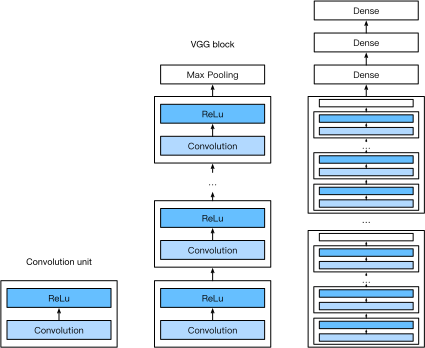

In [328]:
#VGG network
from IPython.display import SVG
SVG(filename="/Users/admin/Documents/Abeja/d2l/img/vgg.svg")

The original VGG network had 5 convolutional blocks, among which the first two have one convolutional layer each and the latter three contain two convolutional layers each. The first block has 64 output channels and each subsequent block doubles the number of output channels, until that number reaches $512$. Since this network uses $8$ convolutional layers and $3$ fully-connected layers, it is often called VGG-11.

In [326]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [332]:
#vgg-11 network - looping over conv_arch

# 11 cause 4 vgg block( 2 conv layer each) and 3 fully connected layer
class Flatten(torch.nn.Module):
    def forward(self,x):
        return x.view(x.shape[0],-1)
def vgg(conv_arch):
    conv_layers=[]
    in_channels=1
    for (num_convs,out_channels) in conv_arch:
        conv_layers.append(vgg_block(num_convs,in_channels,out_channels))
        in_channels=out_channels
    net=nn.Sequential(*conv_layers,
                     Flatten(),
                     nn.Linear(in_features=512*7*7,out_features=4096),
                     nn.ReLU(),
                     nn.Dropout(0.5),
                     nn.Linear(4096,4096),
                     nn.ReLU(),
                     nn.Dropout(0.5),
                     nn.Linear(4096,10))
    return net
net=vgg(conv_arch)
    

In [336]:
X = torch.randn(size=(1,1,224,224), dtype=torch.float32)
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)
#we halved the height and width at each block, ending up with 7 in the end.

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
#model training
learning_rate,epochs,batch_size,device=0.05,5,62,d2l.try_gpu()
def init_weights(m):
    if type(m)==nn.Linear or type(m)==nn.Conv2d:
        torch.nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)
net=net.to(device)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
#resize to 224
criterion=nn.CrossEntropyLoss()
d2l.train_ch5(net,train_iter,test_iter,criterion,epochs,batch_size,device,learning_rate)

training on cpu


Network in Network(NiN)

In [338]:
#NinBlocks

#leNet,AlexNet,VGg all common in design that:
#1) extract features through sequence of convs layers and pooling layer
# 2) then post-process these representation via fully connected layers

#Nin is based on using MLP on the channels for each pixel separately
# main diff is that Nin avoids using fully connected layers altogether #reduces overfitting as lesser parameters
#the global average pooling layer will yeild a vector of logits
#main advantage is that it significantly reduces the number of required model parameters
#however in practice this design sometimes requires increased model training time.

#each blk has 1 conv layer and 2 1x1 conv layer #allow for more per-pixel nonlinearity
def nin_block(in_channels,out_channels,kernel_size,strides,padding):
    blk=nn.Sequential(nn.Conv2d(in_channels,out_channels,kernel_size,strides,padding),
                     nn.ReLU(),
                     nn.Conv2d(out_channels,out_channels,kernel_size=1), #1x1 conv layer
                     nn.ReLU(),
                     nn.Conv2d(out_channels,out_channels,kernel_size=1), #1x1 conv layer
                     nn.ReLU())
    return blk

In [340]:
#NiN Model

# there is a maxpool layer after every Nin block
# before the last ninblock, dropout is used
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.n1=nin_block(1,out_channels=96,kernel_size=11,strides=4,padding=0)
        self.m1=nn.MaxPool2d(3,stride=2)
        self.n2=nin_block(96,out_channels=256,kernel_size=5,strides=1,padding=2)
        self.m2=nn.MaxPool2d(3,stride=2)
        self.n3=nin_block(256,out_channels=384,kernel_size=3,strides=1,padding=1)
        self.m3=nn.MaxPool2d(3,stride=2)
        self.dropout1=nn.Dropout2d(0.5)
        self.n4=nin_block(384,out_channels=10,kernel_size=3,strides=1,padding=1)
        self.avg1=nn.AdaptiveMaxPool2d((1,1)) #averagenpooling iwht output size=(1,1)
        self.flat=Flatten()
    def forward(self,x):
        x=self.m1(self.n1(x))
        x=self.m2(self.n2(x))
        x=self.m3(self.n3(x))
        x=self.dropout1(x)
        x=self.avg1(self.n4(x))
        x=self.flat(x)
        return x
class Flatten(nn.Module):
    def forward(self,input):
        return input.view(input.size(0),-1)

In [341]:
net = Net()
X = torch.rand(size=(1,1,224,224))
for layer in net.children():
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout2d output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveMaxPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


In [ ]:
learning_rate,epochs,batch_size,device=0.1.5.128,d2l.try_gpu()
def init_weights(m):
    if type(m)==nn.Linear() or type(m)==nn.Conv2d:
        torch.nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)
train_iter,test_iter=d2l.load_data_fashion_mnist(batch+size,resize=224)
d2l.train_ch5(net,train_iter,test_iter,criterion,epochs,batch_size,device,learning_rate)

Network with Parallel Concatenattions(GoogLeNet)

In [352]:
#Inception Blocks
# 4 parallel paths
class Inception(nn.Module):
    def __init__(self,in_channels,c1,c2,c3,c4,**kwargs):
        super(Inception,self).__init__(**kwargs)
        #c1,c2,c3,c4= no. of output channels for each layer in path
        self.p1_1=nn.Conv2d(in_channels,c1,kernel_size=1)
        
        self.p2_1=nn.Conv2d(in_channels,c2[0],kernel_size=1)
        self.p2_2=nn.Conv2d(c2[0],c2[1],kernel_size=3,padding=1)
        
        self.p3_1=nn.Conv2d(in_channels,c3[0],kernel_size=1)
        self.p3_2=nn.Conv2d(c3[0],c3[1],kernel_size=5,padding=2)
        
        self.p4_1=nn.MaxPool2d(kernel_size=3,stride=1,padding=1)
        self.p4_2=nn.Conv2d(in_channels,c4,kernel_size=1)
    def forward(self,x):
        p1=F.relu(self.p1_1(x))
        p2=F.relu(self.p2_2(self.p2_1(x)))
        p3=F.relu(self.p3_2(self.p3_1(x)))
        p4=F.relu(self.p4_2(self.p4_1(x)))
        return torch.cat((p1,p2,p3,p4),dim=1) #concatenate outputs on the channel dim

In [353]:
#GoogLeNet Model
#combines strengths of NiN and the repeated blocks paradigms
#effecient model with good test accuracy

b1=nn.Sequential(nn.Conv2d(1,64,kernel_size=7,stride=2,padding=3),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3,stride=2,padding=1))
#first block 64-channel 7x7 conv layer & 3x3 maxpool

b2=nn.Sequential(nn.Conv2d(64,64,kernel_size=1),
                nn.ReLU(),
                nn.Conv2d(64,192,kernel_size=3,padding=1),
                nn.MaxPool2d(kernel_size=3,stride=2,padding=1))
#2nd block 64 channel 1x1 conv layer then 3x3 conv layer(triples no. of channels)

b3=nn.Sequential(Inception(192,64,(96,128),(16,32),32),
                Inception(256,128,(128,192),(32,96),64),
                nn.MaxPool2d(kernel_size=3,stride=2,padding=1))
#3rd block is with 2 inception blocks and one maxpool.
# first inception output=64+128+32+32=256 channels
# 2nd inception output=128+192+96+64=480 channels

b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
#4th block has 4 inception blocks and one maxpool.

b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveMaxPool2d((1,1)), #avg pooling
                   Flatten())
# 5th block has 2 inception blocks following by global avg pooling to change h and w of each channel to 1
# then turn output into a 2d array

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))
#then a fully connected layer whose number of outputs is the number of label classes

In [ ]:
#training our model:
learning_rate,epochs,batch_size,device=0.1,5.128,d2l.try_gpu()
def init_weights(m):
    if type(m)==nn.Linear or type(m)==nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)
criterion=nn.CrossEntropyLoss()
 
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
#resize to 96x96 pixel resolution

d2l.train_ch5(net,train_iter,test_iter,criterion,epochs,batch_size,device,learning_rate)

Batch Normalisaiton

In [354]:
#Implementation from scratch
#used after every layers with params
def batch_norm(x,gamma,beta,moving_mean,moving_var,eps,momentum):
    #torch.is_grad_enabled() helps us determing mode is training or prediction mode
    if not torch.is_grad_enabled(): #in prediction mode, directly use mean and var from incoming mov avg
        x_hat=(x-moving_mean)/torch.sqrt(moving_var+eps)
    else:
        #training mode
        assert len(x.shape) in (2,4)
        if len(x.shape)==2:
            #fully connected layer, calc mean and var on feature dim
            mean=x.mean(dim=0)
            var=((x-mean)**2).mean(dim=0)
        else:
            #2d conv layer,cal mean and var on channel dim
            #and we need to maintain shape of x so that broadcast op can be carried out later
            mean=x.mean(dim=(0,2,3),keepdim=True)
            var=((x-mean)**2).mean(dim=(0,2,3),keepdim=True)
        x_hat=(x-mean)/torch.sqrt(var+eps)
        moving_mean=momentum*moving_mean +(1.0-momentum)*mean
        moving_var=momentum*moving_var + (1.0-momemtum)*var
    Y=gamma*x_hat +beta #scale and shift
    return Y,moving_mean,moving_var

In [355]:
class BatchNorm(nn.Module):
    def __init__(self,num_features,num_dims,**kwargs):
        super(BatchNorm,self).__init__(**kwargs)
        if num_dims==2:
            shape=(1,num_features)
        else:
            shape=(1,num_features,1,1)
        self.gamma=nn.Parameter(torch.ones(shape))
        self.beta=nn.Parameter(torch.zeros(shape))
        #variables not invovled in gradient finding and iterations initalised to 0
        self.moving_mean=torch.zeros(shape)
        self.moving_var=torch.zeros(shape)
    def forward(self,x):
        #if x not on cpu, need to move moving_mean and moving_var to device where x is located
        if self.moving_mean.device !=x.device:
            self.moving_mean=self.moving_mean.to(x.device)
            self.moving_vat=self.moving_var.to(x.device)
        Y,self.moving_mean,self.moving_var=batch_norm(x,self.gamma,self.beta,self.moving_var,eps=1e-5,momemtum=0.9)
        return Y
    
    

In [356]:
#Batch Norm LeNet
net = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5),
                    BatchNorm(6, num_dims=4), #batchnorm after every conv or linear layer!
                    nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5),
                    BatchNorm(16, num_dims=4),
                    nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    Flatten(),
                    nn.Linear(16*4*4, 120),
                    BatchNorm(120, num_dims=2),
                    nn.Sigmoid(),
                    nn.Linear(120, 84),
                    BatchNorm(84, num_dims=2),
                    nn.Sigmoid(),
                    nn.Linear(84, 10)) #output dont need apply batch norm

In [ ]:
# training of net as usual
learning_rate.epochs,batch_size,device=1,5,256,d2l.try_gpu()
net.apply(init_weights)
d2l.train_ch5(net,train_iter,test_iter,criterion,epochs,batch_size,device,learning_rate)

#to access scale parameter gamma and shift param beta learned from first batch norm layer:
list(net.children())[1].gamma.reshape((-1,)), list(net.children())[1].beta.reshape((-1,))

#batch norm is the 2nd module

In [357]:
?net.children

In [ ]:
#concise inplementation
#nn has _BatchNorm class, with nn.BatchNorm1d for num_dims==2 which is after fully connected layer
# and nn.BatchNorm2d for num_dims==4 which is after conv layer
#pass in number of features as arguments for both
net = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5),
                    nn.BatchNorm2d(6), 
                    nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5),
                    nn.BatchNorm2d(16),
                    nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    Flatten(),
                    nn.Linear(256, 120),
                    nn.BatchNorm1d(120),
                    nn.Sigmoid(),
                    nn.Linear(120, 84),
                    nn.BatchNorm1d(84),
                    nn.Sigmoid(),
                    nn.Linear(84, 10))

Residual Networks(ResNet)

In [377]:
class Residual(nn.Module):
    def __init__(self,input_channels,num_channels,use_1x1conv=False,strides=1,**kwargs):
        super(Residual,self).__init__(**kwargs)
        self.conv1=nn.Conv2d(input_channels,num_channels,kernel_size=3,padding=1,stride=strides)
        self.conv2=nn.Conv2d(num_channels,num_channels,kernel_size=3,padding=1,stride=1)
        
        if use_1x1conv:
            self.conv3=nn.Conv2d(input_channels,num_channels,kernel_size=1,stride=strides)
        else:
            self.conv3=None
        self.bn1=nn.BatchNorm2d(num_channels)
        self.bn2=nn.BatchNorm2d(num_channels)
        self.relu=nn.ReLU(inplace=True)
    def forward(self,x):
        Y=self.relu(self.bn1(self.conv1(x)))
        Y=self.bn2(self.conv2(Y))
        if self.conv3:  
            x=self.conv3(x)
        Y+=x
        Y=self.relu(Y)
        return Y
#output of 2 conv layer will have same shape as input to be able to add togeter
# if we want to change channels or stride, then use 1x1 conv layer to change input,x to the name shape

#this generates 2 types of networks:
# 1) add input to the output before applying ReLU
# 2) when use_1x1conv=True, adjust channels and resolution using 1x1 conv layer before addomg

In [378]:
# input output same shape:
blk=Residual(3,3)
x=torch.rand(4,3,6,6)
y=blk(x)
y.shape

torch.Size([4, 3, 6, 6])

In [379]:
# half output height and width,& increasing output channels
blk=Residual(3,6,use_1x1conv=True,strides=2) #use_1x1conv when we want to change output channel 
#default output channel is same as input
blk(x).shape

torch.Size([4, 6, 3, 3])

ResNet Model

In [380]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                    nn.BatchNorm2d(64), #batchnorm after conv layer
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [381]:
def resnet_block(input_channels,num_channels,num_residuals,first_block=False):
    blk=[]
    for i in range(num_residuals):
        if i==0 and not first_block:
            blk.append(Residual(input_channels,num_channels,use_1x1conv=True,strides=2))
        else:
            blk.append(Residual(num_channels,num_channels))
    return blk
# each resblocks has the same num of output channels
# first module: num channels same as input channels

#both conv and sequential in nature

#same structure as GoogLeNet, but it is easier to modify

In [382]:
b2= nn.Sequential(*resnet_block(64,64,2,first_block=True))
b3=nn.Sequential(*resnet_block(64,128,2))
b4=nn.Sequential(*resnet_block(128,256,2))
b5=nn.Sequential(*resnet_block(256,512,2))

net=nn.Sequential(b1,b2,b3,b4,b5,
                  nn.AdaptiveMaxPool2d((1,1)), #avg pooling
                  Flatten(), 
                  nn.Linear(512, 10))



In [ ]:
learning_rate,epochs, batch_size=0.05,10,256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=96)
d2l.train_ch6(net,train_iter,test_iter,epochs,learning_rate)


Densely connected Networks(DenseNet)

In [386]:
#Dense Blocks
def conv_block(input_channels,num_channels):
    layers=[]
    layers.append(nn.BatchNorm2d(input_channels))
    layers.append(nn.ReLU())
    layers.append(nn.Conv2d(input_channels,num_channels,kernel_size=3,padding=1))
    blk=nn.Sequential(*layers)
    return blk
 
class DenseBlock(nn.Module):
    def __init__(self,num_convs,input_channels,num_channels,**kwargs):
        super(DenseBlock,self).__init__(**kwargs)
        layer=[]
        for i in range(num_convs):
            layer.append(conv_block((num_channels*i +input_channels),num_channels))
        self.net=nn.Sequential(*layer)
    def forward(self,x):
        for blk in self.net:
            y=blk(x)
            x=torch.cat((x,y),dim=1)#concat at channel, increase numof channel outputs
        return x

In [388]:
blk=DenseBlock(2,3,10) 
#2 conv layer, 3 input channels,10 output channels for each layer
# output =3 + 2*10 output channels
# no.of conv blocks channels controls the increase in the number of output channels relative to the number of input channels === growth rate

x=torch.randn(4,3,8,8)
y=blk(x)
y.shape

torch.Size([4, 23, 8, 8])

In [390]:
#Transition layers
def transition_block(input_channels,num_channels): #to reduce num of channels
    layers=[]
    layers.append(nn.BatchNorm2d(input_channels))
    layers.append(nn.ReLU())
    layers.append(nn.Conv2d(input_channels,num_channels,kernel_size=1)) #1x1 conv to reduce channels
    layers.append(nn.AvgPool2d(kernel_size=2,stride=2)) 
    blk=nn.Sequential(*layers)
    return blk

In [392]:
blk=transition_block(23,10)
blk(y).shape # output channels reduce to 4, halved the width and height

torch.Size([4, 10, 4, 4])

In [393]:
#DenseNet Model
class Flatten(torch.nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)

class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1,1,96,96)

    
layers = []
layers.append(Reshape())
layers.append(nn.Conv2d(in_channels=1, out_channels=64, kernel_size=7, stride=2, padding=3))
layers.append(nn.BatchNorm2d(64))
layers.append(nn.ReLU())
layers.append(nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [403]:
# we can set the num of conv layers used in each Dense blks.
# here we set num of channels(growth rate) to 32, so that 128 channels will be added to each dense blk

num_channels,growth_rate =64,32 #num_channels=current num of channels
num_convs_in_dense_blocks=[4,4,4,4]
for i,num_convs in enumerate(num_convs_in_dense_blocks):
    layers.append(DenseBlock(num_convs,num_channels,growth_rate))
    num_channels+=num_convs*growth_rate
    
    if i != len(num_convs_in_dense_blocks)-1: #if not the last block
        layers.append(transition_block(num_channels,num_channels//2))
        num_channels=num_channels//2
        


In [404]:
layers.append(nn.BatchNorm2d(num_channels))
layers.append(nn.ReLU())
layers.append(nn.AdaptiveMaxPool2d((1,1)))
layers.append(Flatten())
layers.append(nn.Linear(num_channels, 10))

In [405]:
net=nn.Sequential(*layers)

In [406]:
print(net)

Sequential(
  (0): Reshape()
  (1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (5): DenseBlock(
    (net): Sequential(
      (0): Sequential(
        (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
        (2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
        (2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (2): Sequential(
        (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
        (2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
   

In [ ]:
#training our model
learning_rate,epochs,batch_size,device=0.1,5,64,d2l.try_gpu()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)

net.apply(init_weights)
train_ch5(net,train_iter,test_iter,criterion,epochs,batch_size,device,learning_rate)

In [409]:
x=torch.tensor([[1,2,3,4],
             [1,2,3,4]])
y=torch.tensor([[5,2,3,4],
             [5,2,3,4]])
print(torch.cat((x,y),dim=0))
print(torch.cat((x,y),dim=1))

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [5, 2, 3, 4],
        [5, 2, 3, 4]])
tensor([[1, 2, 3, 4, 5, 2, 3, 4],
        [1, 2, 3, 4, 5, 2, 3, 4]])


# Computer Vision

In [410]:
pwd

'/Users/admin/Documents/Abeja/d2l'

In [442]:
import imageio
import PIL
from PIL import Image

In [439]:
#img=imageio.imread('/Users/admin/Documents/Abeja/d2l/img/cat1.jpg')

In [444]:
img=Image.open('/Users/admin/Documents/Abeja/d2l/img/cat1.jpg')

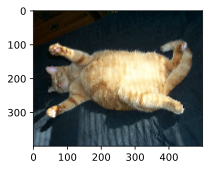

In [445]:
plt.imshow(img)

In [473]:
def apply(img,aug,num_rows=2,num_cols=4,scale=1.5):
    Y=[aug(img) for i in range(num_cols*num_rows)]

    for i in range(num_cols*num_rows):
        plt.subplot(num_rows,num_cols,i+1)
        plt.imshow(Y[i])
#this function runs the images augmentation method,arg multiple times on the input input and show all result

In [420]:
import torchvision

In [434]:
?torchvision.transforms.RandomHorizontalFlip

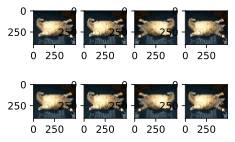

In [479]:
#flipping and cropping
#usually doesn't change the category of the object

apply(img,torchvision.transforms.RandomHorizontalFlip(0.5))

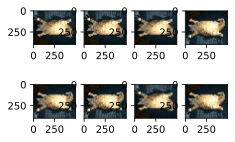

In [478]:
apply(img,torchvision.transforms.RandomVerticalFlip(0.5))

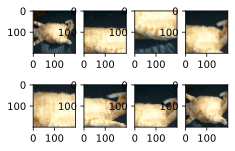

In [481]:
#random cropping of different size(different resolution)
shape_aug=torchvision.transforms.RandomResizedCrop((200,200),scale=(0.1,1),ratio=(0.5,2))
# this will randomly crop a region with area of 10% to 100% of original are
# the ratio of width to height in the region is randomly selected form between 0.5 and 2.0
# then the width and heigh of the region are both scaled to 200 pixels
apply(img,shape_aug)

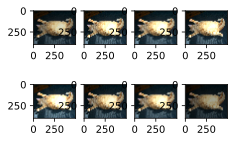

In [484]:
#changing color
apply(img,torchvision.transforms.ColorJitter(brightness=0.5))
#will randomly change the brightness of the image to a value between 50%(1-0.5) & 150%(1+0.5)

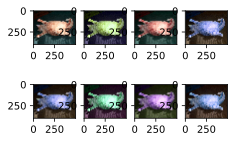

In [486]:
apply(img,torchvision.transforms.ColorJitter(hue=0.5))
#can also randomly change the hue. chosen randomly from [-hue,hue]


#contrast: [max(0,1-contrast),1+contrast] or [min,max]
#saturation: [max(0,1-saturation),1+saturation] or[min,max]

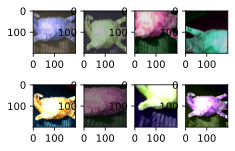

In [490]:
#overlaying multiple Image augmentation Methods
augs=torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(0.5),
                                    torchvision.transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5),
                                    torchvision.transforms.RandomResizedCrop((200,200),scale=(0.1,1),ratio=(0.5,2))])
apply(img,augs)

In [497]:
pwd

'/Users/admin/Documents/Abeja/d2l'

In [505]:
#using an image augmentation training model
dataimg=torchvision.datasets.CIFAR10('/Users/admin/Documents/Abeja/d2l/data',train=True,download=True)


Files already downloaded and verified


In [509]:
dataimg

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /Users/admin/Documents/Abeja/d2l/data
    Split: Train

In [510]:
data=torch.utils.data.DataLoader(dataimg,batch_size=4,shuffle=True)

In [513]:
import os
path = '/Users/admin/Documents/Abeja/d2l/data/cifar-10-batches-py'

all_img = [f for f in sorted(os.listdir(path))
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]

In [522]:
from mxnet import gluon,image,init,np,npx

AttributeError: 'NDArray' object has no attribute 'numpy'

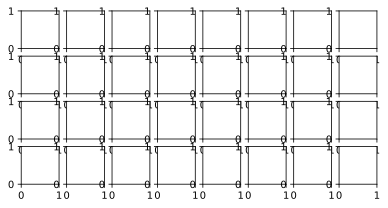

In [523]:
d2l.show_images(gluon.data.vision.CIFAR10(train=True)[0:32][0],4,8,scale=0.8)

In [524]:
train_augs=torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(0.5),
                                          torchvision.transforms.ToTensor()])
test_augs=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [525]:
def load_cifar10(is_train,augs,batch_size):
    return torch.utils.data.DataLoader(dataimg,batch_size=batch_size,shuffle=is_train,num_workers=4)

Object Detection and Bounding Boxes

In [526]:
import numpy as np

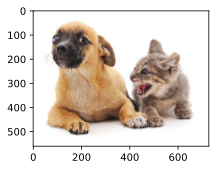

In [533]:
plt.figure(figsize=(3.5,2.5))
img=plt.imread('/Users/admin/Documents/Abeja/d2l/img/catdog.jpg')
plt.imshow(img) #2 target objects

In [534]:
#bounding box
dog_bbox,cat_bbox=[60, 45, 378, 516], [400, 112, 655, 493]

In [536]:
def bbox_to_rect(bbox,color):
    "convert bbox to matplotlib format"
    return plt.Rectangle(
        xy=(bbox[0],bbox[1]),width=bbox[2]-bbox[1],height=bbox[3]-bbox[1],
    fill=False,edgecolor=color,linewidth=2)

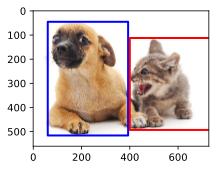

In [537]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))

Anchor Boxes

In [538]:
h,w=img.shape[0:2]
x=torch.rand((1,3,h,w))
y=d2l.MultiBoxPrior((h,w),sizes=[0.75,0.5,0.25],aspect_ratios = (2, 0.5))
#MultiBoxPrior: specify input,a set of size,a set of aspect ratio and the function will return all the anchor boxes entered
y.shape #(batch_size,num of anchor boxes)

torch.Size([2042040, 4])

In [539]:

boxes=y.clone().reshape((h,w,5,4))
#change shape to (image height,width,num of anchor boxes centered on a specified pixel position,4)
boxes[250,250,0,:] #acess the first anchor box centered on 250,250
#x,y,height,width of anchor box
#x,y,heigh,width are divided by width and heigh of the image to make range between 0 and 1

tensor([0.3441, 0.4465, 0.7500, 0.7500])

In [543]:
def show_bboxes(axes,bboxes,labels=None,colors=None):
    def make_list(obj,default_values=None):
        if obj is None:
            obj=default_values
        elif not isinstance(obj,(list,tuple)):
            obj=[obj]
        return obj
    labels=make_list(labels)
    colors=make_list(colors,['b', 'g', 'r', 'm', 'c'])
    for i,bbox in enumerate(bboxes):
        color=colors[i% len(colors)]
        rect=bbox_to_rect(bbox.numpy(),color)
        axes.add_patch(rect)
        if labels and len(labels)>i:
            text_color='k' if color=='w' else 'w'
            axes.text(rect.xy[0],rect.xy[1],labels[i],va='center',ha='center',fontsize=9,
                     color=text_color,bbox=dict(facecolor=color,lw=0))

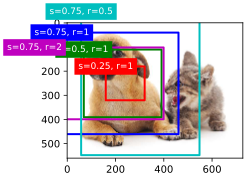

In [544]:
plt.figure(figsize=(3.5,2.5))
bbox_scale = torch.tensor((w, h, w, h)).float()
fig = plt.imshow(img)
show_bboxes(fig.axes, d2l.center_2_hw(boxes[250,250,:,:]) * bbox_scale,
            ['s=0.75, r=1', 's=0.5, r=1', 's=0.25, r=1', 's=0.75, r=2',
             's=0.75, r=0.5'])
#need to restore the original coordinate values of the anchor boxes therfore bbox_scale needs to be defines
#bboxes are centered on (250,250)

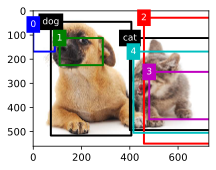

In [548]:
#Labeling Training Set Anchor Boxes

ground_truth_class = torch.Tensor([[0], [1]])
ground_truth_bbox = torch.Tensor([[0.1, 0.08, 0.52, 0.92],
                         [0.55, 0.2, 0.9, 0.88]])
anchors = torch.Tensor([[0, 0.1, 0.2, 0.3], [0.15, 0.2, 0.4, 0.4],
                    [0.63, 0.05, 0.88, 0.98], [0.66, 0.45, 0.8, 0.8],
                    [0.57, 0.3, 0.92, 0.9]])

fig=plt.imshow(img)
show_bboxes(fig.axes,ground_truth_bbox*bbox_scale,['dog','cat'],'k')
show_bboxes(fig.axes,anchors*bbox_scale,['0','1','2','3','4'])

In [549]:
#can label cat and offsets for anchor boxes using the MultiBoxTarget function
# sets background cat to 0 and increments the integer index of the target category from zero by 1(1 for dog ,2 for cat)

labels = d2l.MultiBoxTarget(ground_truth_class.clone(), ground_truth_bbox, anchors)


# will return 3 items, thid item is the category labelled for the anchor box
# second item is a mask variable, with the shape of (batch size.4 times the number of anchor boxes)
# the elements in the mask variable correspond 1-1 with the four offset values of each anchor box
# by multiplying with element the 0 in the mark variable can filter out negative class offset(background)
# first item return is the four offset values labelled for each anchor box,where offsets of negative class anchor boxes labeled as 0

RuntimeError: expected dtype Long but got dtype Float

In [550]:
#output Bounding Boxes for Prediction

anchors = torch.Tensor([[0.1, 0.08, 0.52, 0.92], [0.08, 0.2, 0.56, 0.95],
                    [0.15, 0.3, 0.62, 0.91], [0.55, 0.2, 0.9, 0.88]])
# four anchor boxes
# offset_preds=torch.Tensor([0]*anchors.size(0))
#assume that all predicted offsets are 0, which means prediction bounding boxes are anchor boxes

cls_probs=torch.Tensor([[0]*4, #pred probs for background
                       [0.9,0.8,0.7,0.1], #pred probs for dog
                       [0.1,0.2,0.3,0.9]]) #pred probs for cat

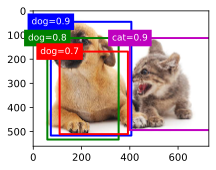

In [553]:
#print bboxes and their confidence levels on the image
fig=plt.imshow(img)
show_bboxes(fig.axes,anchors*bbox_scale,
           ['dog=0.9','dog=0.8','dog=0.7','cat=0.9'])


In [554]:
#use MultiBoxDetection function to perform NMS(non-max suppression)
#threshold=0.5
# adds an example dim to the Tensor input, shape of return result is(batch size,num of anchor box,6)
# the 6 elements of each row represent output info for the same prediction bbox
# first: predicted category index:0 dog,1 cat
# 2nd: CI of prediction bbox
# remaining 4= bbox info


In [556]:
id_category=dict()
id_category[0]='dog'
id_category[1]='cat'
id_category

{0: 'dog', 1: 'cat'}

In [557]:
output=d2l.MultiboxDetection(id_category,cls_probs,anchors,nms_threshold=0.5)
output

tensor([[0.0000, 0.9000, 0.1000, 0.0800, 0.5200, 0.9200],
        [1.0000, 0.9000, 0.5500, 0.2000, 0.9000, 0.8800]])

dog=0.9
cat=0.9


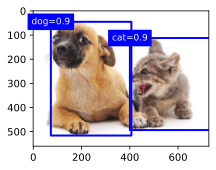

In [562]:
fig=plt.imshow(img)
for i in output.numpy():
    #first element of 1 tells us cat
    #2nd element tells us CI
    label= ('dog=','cat=')[int(i[0])] + str(i[1])
    print(label)
    show_bboxes(fig.axes,[torch.Tensor(i[2:])*bbox_scale],label)
    #show_bboxes(axes,bboxes,labels)

In [563]:
bbox_scale # (height, width, height, width)

tensor([728., 561., 728., 561.])

In [564]:
img.shape

(561, 728, 3)

In [565]:
# in practice, remove prediction bboxes with lower CI before performing NMS, thereby reducing amt of computation for NMs.
# can also filter the output of NMS, e.g by only retaining result with higher CI as the final output

Multiscale Object Detection

In [569]:
h,w=img.shape[0:2]

In [577]:
def display_anchors(fmap_w,fmap_h,s):
    plt.figure(figsize=(3.5,2.5))
    fmap=torch.zeros((1,10,fmap_w,fmap_h)) #10 channels
    anchors=d2l.MultiBoxPrior((h,w),sizes=s,aspect_ratios=(2,2.5))
    anchors=anchors.reshape((h,w,3,4)) #3 anchor box each set
    centers= d2l.get_centers(h,w,fmap_h,fmap_w)
    for i in range(len(centers)):#iterate through all the centers
        anch=torch.cat([anchors[centers[i,1],centers[i,0],:,:]])   
        bbox_scale=torch.tensor((w,h,w,h)).float()
        d2l.show_bboxes(plt.imshow(img).axes,d2l.center_2_hw(anch)*bbox_scale)

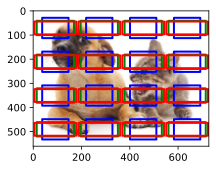

In [578]:
display_anchors(4,4,[0.15])

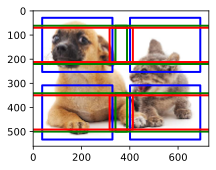

In [579]:
display_anchors(fmap_w=2,fmap_h=2,s=[0.4]) #reduce h and w of feature map, but increase size
# when size=0.4, overlaps will ovvur between regions of some anchor box

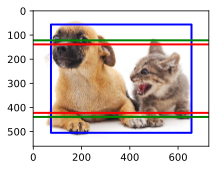

In [580]:
display_anchors(fmap_w=1,fmap_h=1,s=[0.8])
#now midpoint of anchor box is center of image

Object Detection Dataset

In [583]:
import json
import torchvision.transforms as transforms

In [582]:
def download_pikachu(data_dir):
    root_url = ('https://apache-mxnet.s3-accelerate.amazonaws.com/'
                'gluon/dataset/pikachu/')
    dataset = {'train.rec': 'e6bcb6ffba1ac04ff8a9b1115e650af56ee969c8',
               'train.idx': 'dcf7318b2602c06428b9988470c731621716c393',
               'val.rec': 'd6c33f799b4d058e82f2cb5bd9a976f69d72d520'}
    for k,v in dataset.items():
        d2l.download_url(root_url+k,data_dir)
d2l.download_and_preprocess_data()

NameError: name 'batch_size' is not defined

In [584]:
class PIKACHU(torch.utils.data.Dataset): #loads the annotationfile(json) which contrains image names and their bbox anotation
    def __init__(self,data_dir,set,transform=None,target_transform=None):
        self.image_size=(3,256,256)
        self.images_dir=os.path.join(data_dir,set,'images')
        self.set=set
        self.transform=transforms.Compose([transforms.ToTensor()])
        self.target_transform=target_transform
        annotations_file=os.path.join(data_dir,set,'annotations.json')
        with open(annotations_file) as file:
            self.annotations=json.load(file)
            
    def __getitem__(self,index):
        annotations_i=self.annotations['data_' +str(index+1)]
        image_path=os.path.join(self.images_dir, annotations_i['image'])
        img=np.array(Image.open(image_path).convert('RGB').resize((self.image_size[2],self.image_size[1]),Image.BILINEAR))
        
        loc=np.array(annotations_i['loc'])
        loc_chw=np.zeros((4,))
        loc_chw[0]=(loc[0]+loc[2])/2
        loc_chw[1]=(loc[1]+loc[3])/2
        loc_chw[2]= (loc[2]-loc[0]) #width
        loc_chw[3]=(loc[3]-loc[1]) #height
        
        label=1-annotations_i['class']
        if self.transform is not None:
            img=self.transform(img)
        return (img,loc_chw,label)
    
    def __len__(self):
        return len(self.annotations)
                     

In [585]:
pwd

'/Users/admin/Documents/Abeja/d2l'

In [586]:
data_dir='/Users/admin/Documents/Abeja/d2l/data/pikachu'
train_dataset=PIKACHU(data_dir,'train')
val_dataset=PIKACHU(data_dir,'val')

In [587]:
batch_size=32
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=4)

val_loader= torch.utils.data.DataLoader(val_dataset,
                                         batch_size=batch_size, shuffle=False,
                                         num_workers=4)
batch=next(iter(train_loader))

print(batch[0].shape,batch[1].shape,batch[2].shape)
# shape of image,ground truth bb and label
# image:(batch size,num channels,height,width)
#ground truth bb: (batchsize,m,4), m=max num of bb contained in a single image in the dataset
# label: (batchsize,m)

#computation for minibatch efficient, but requires each image to contain same num of bb so that they can be places in the same batch
#since each image diff num of bb, can add illegal bb to images with less than m bb
#when value of label is -1, bb is illegal bb
#remain 4 elements are bb info (centre x,centrey,height,width)

#here, dataset only one bb per image, therefore m=1

torch.Size([32, 3, 256, 256]) torch.Size([32, 4]) torch.Size([32])


In [588]:
#Graphic data
imgs=[train_dataset[i][0].permute(1,2,0) for i in range(10)]
labels=[d2l.center_2_hw(torch.Tensor(train_dataset[i][1]).unsqueeze(0)) for i in range(10)]

In [600]:
labels[0].squeeze(0)*256

tensor([154.8146, 102.8997, 177.8775, 137.0702])

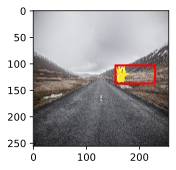

In [602]:
plt.imshow(imgs[0]).axes.add_patch(bbox_to_rect(labels[0].squeeze(0)*256,'r'))


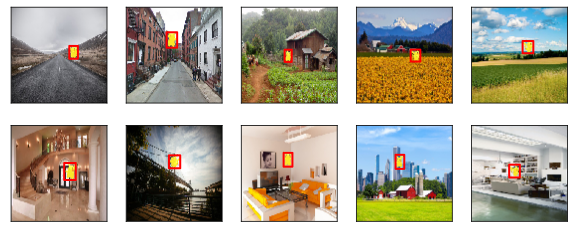

In [605]:
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, labels):
    d2l.show_bboxes(ax, [label.squeeze(0)*256], colors=['r'])
    
    
    

SyntaxError: 'return' outside function (<ipython-input-623-b56d8e597884>, line 6)

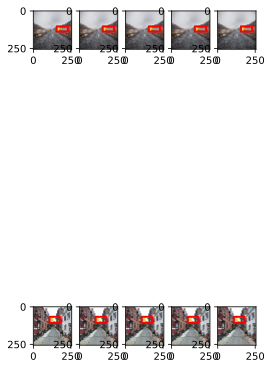

In [623]:
#or
_,axes=plt.subplots(2,5,figsize=(4,10))
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(imgs[i]).axes.add_patch(bbox_to_rect(labels[i].squeeze(0)*256,'r'))
return axes

#
#for i in range(10):
#    plt.subplot(2,5,i+1)
#    plt.imshow(imgs[i]).axes.add_patch(bbox_to_rect(labels[i].squeeze(0)*256,'r'))

Single Shot Multibox Detection(SSD)


In [624]:
from tqdm import tqdm

def cls_predictor(input_channels,num_anchors,num_classes):
    return nn.Conv2d(in_channels=input_channels,out_channels=num_anchors*(num_classes+1),kernel_size=3,padding=1)

In [625]:
#BBox Prediction Layer
#design dimilar to that of cat prediction layer, only diff is that we need to predict 
# 4 offsets for each anchor box, rather than q+1 cats

def bbox_predictor(input_channels_num_anchors):
    return nn.Conv2d(in_channels=input_channels,out_channels=num_anchors*4,kernel_size=3,padding=1)


In [626]:
#Concatenating Predictions for Mulyiple Scales
# because shapes and num of anchor boxes centered on the same element differ for the feature maps of different scales,
# the prediction outputs at different scales may have different shapes

def forward(x,block):
    return block(x)
#use same batch of data to construct feature maps of 2 different scales

Y1=forward(torch.zeros((2,8,20,20)),cls_predictor(8,5,10))
#output channels=5*(10+1)

Y2 = forward(torch.zeros((2, 16, 10, 10)), cls_predictor(16, 3, 10))
#height & width is half of Y1
#output channels= 3*(10+1)

(Y1.shape,Y2.shape)
#  (batch size, number of channels, height, width)

(torch.Size([2, 55, 20, 20]), torch.Size([2, 33, 10, 10]))

In [627]:
#channel dim contrains pred for all anchor boxes with the same center
#first move channel dim to final dim 
#because batch_size always the same, can convert pred results to binary format
# (batchsize,height*width*numchannels) #to facilitate subsequent concatenation on 1st dim

def flatten_pred(pred):
    return pred.permute(0,2,3,1).reshape(pred.size(0),-1)

#tensor.permute() swaps axis from (0,1,2,3) to (0,2,3,1)
def concat_preds(preds):
    return torch.cat(tuple([flatten_pred(p)for p in preds]),dim=1)

# regardless of diff shapes of Y1 and Y2,the 2 diff scales, we can still
# concatenate the pred results of the same batch



In [628]:
concat_preds([Y1,Y2]).shape

torch.Size([2, 25300])

In [630]:
Y1.shape

torch.Size([2, 55, 20, 20])

In [633]:
print(Y1.permute(0,2,3,1).shape)
print(Y1.permute(0,2,3,1).reshape(Y1.size(0),-1).shape)

torch.Size([2, 20, 20, 55])
torch.Size([2, 22000])


In [634]:
print(Y2.permute(0,2,3,1).shape)
print(Y2.permute(0,2,3,1).reshape(Y2.size(0),-1).shape)

torch.Size([2, 10, 10, 33])
torch.Size([2, 3300])


In [635]:
#height and width Downsample block
def down_sample_blk(input_channels,num_channels):
    blk=[]
    for _ in range(2):
        blk.append(nn.Conv2d(in_channels=input_channels,out_channels=num_channels,kernel_size=3,padding=1))
        blk.append(nn.BatchNorm2d(num_features=num_channels))
        blk.append(nn.ReLU())
        input_channels=num_channels
    blk.append(nn.MaxPool2d(kernel_size=2,stride=2))
    blk=nn.Sequential(*blk)
    return blk

# this blk reduces height and width by 50%
# consist of 2 3x3 conv layer with padding 1 , which does not change shape of feature maps
# 1 2x2 maxpool with stride 2, which reduces size of feature map by half

#1 x 2 +(3-1) +(3-1)=6, therefore output feature has a receptive field on the input feaure map of shape 6x6


In [637]:
forward(torch.zeros((2,3,20,20)),down_sample_blk(3,10)).shape
#changes num of input channels, halves the height and width

torch.Size([2, 10, 10, 10])

In [638]:
# Base Network Block
# used to extract features from original images

def base_net():
    blk=[]
    num_filters=[3,16,32,64]
    for i in range(len(num_filters)-1):
        blk.append(down_sample_blk(num_filters[i],num_filters[i+1]))
    blk=nn.Sequential(*blk)
    return blk
# our network consist of 3 h and w downsample blocks. 
# doubles the num of channels at each step
# if we input original image with shape 256x256, outputs a feature map with shape 32x32

forward(torch.zeros((2, 3, 256, 256)), base_net()).shape

torch.Size([2, 64, 32, 32])

In [639]:
# The Complete Model
# ssd model total 5 modules, each modules output a feature map
# 1. base network block
# 2-4. heigh and width down sample block
# 5. global maxpool layer to reduce high and width to 1

def get_blk(i):
    if i==0:
        blk=base_net()
    elif i==1:
        blk=down_sample_blk(64,128)
    elif i==4:
        blk=nn.AdaptiveMaxPool2d((1,1))
    else:
        blk=downsample_blk(128,128)
    return blk
        

In [640]:
import itertools
import math

def create_anchors(feature_map_sizes,steps,sizes):
    scale=256.
    steps=[s/scale for s in steps]
    sizes=[s/scale for s in sizes]
    aspect_ratios=((2,),)
    num_layers=len(feature_map_sizes)
    boxes=[]
    
    for i in range(num_layers):
        fmsize=feature_map_sizes[i]
        for h,w in itertools.product(range(fmsize),repeat=2):
            cx=(w+0.5)*steps[i]
            cy=(h+0.5)*steps[i]
            s=sizes[i]
            boxes.append((cx,cy,s,s))
            
            s=sizes[i+1]
            boxes.append((cx,cy,s,s))
            
            s=sizes[i]
            for ar in aspect_ratios[i]:
                boxes.append((cx,cy,(s*math.sqrt(ar)),(s/math.sqrt(ar))))
                boxes.append(cx,cy,(s/math.sqrt(ar)),(s*math.sqrt(ar)))
            
            return torch.Tensor(boxes)

In [642]:
ratios = [[1, 2, 0.5]] * 5
ratios

[[1, 2, 0.5], [1, 2, 0.5], [1, 2, 0.5], [1, 2, 0.5], [1, 2, 0.5]]